# Capstone Project SET CONNECT ASSIGNMENT 8

## DONE BY L.ANUSH BHARATHWAJ CSE A

### TEAM NAME Insight Strategists
### MEMBER’S NAME:
### ANUSH BHARATHWAJ L
### BALAMURUGAN B
### DHATCHANA H

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import graphviz
from plotnine import *
import scipy.stats as sps
from sklearn import preprocessing
import sklearn.metrics as skm
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import xgboost as xgb
warnings.simplefilter(action="ignore")

/Users/anushbharathwaj/opt/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


### 1) IMPORTING CSV FILE

In [2]:
cars = pd.read_csv('cars1.csv')

In [3]:
cars.shape

(256, 8)

In [4]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [5]:
cars.tail()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
251,17.0,8,305,130,3840,15,1980,US.
252,36.1,4,91,60,1800,16,1979,Japan.
253,22.0,6,232,112,2835,15,1983,US.
254,18.0,6,232,100,3288,16,1972,US.
255,22.0,6,250,105,3353,15,1977,US.


In [6]:
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60',
       'year', 'brand'],
      dtype='object')

In [7]:
cars.isna().any()

mpg            False
cylinders      False
cubicinches    False
hp             False
weightlbs      False
time_to_60     False
year           False
brand          False
dtype: bool

In [8]:
cars.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time_to_60     0
year           0
brand          0
dtype: int64

In [9]:
cars=cars.dropna()

In [10]:
cars

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
251,17.0,8,305,130,3840,15,1980,US.
252,36.1,4,91,60,1800,16,1979,Japan.
253,22.0,6,232,112,2835,15,1983,US.
254,18.0,6,232,100,3288,16,1972,US.


In [11]:
cars.cylinders.nunique()

5

In [12]:
cars.cylinders.unique()

array([8, 4, 5, 6, 3])

In [13]:
cars.cubicinches.nunique()

73

In [14]:
cars.cubicinches.unique()

array([350,  89, 302, 400,  98, 351, 440, 183, 108,  97,  85, 304, 113,
       107,  86, 121, 200,  91,  71, 250, 120, 231,  80, 232, 455, 318,
       122, 141, 340, 116, 156,  90, 360, 168, 305, 198, 112, 119, 262,
       134, 429, 115,  72, 199, 225, 105, 151,  88, 307, 101,  79, 140,
       114, 173, 144,  81, 267,  70, 163, 171, 260, 131,  96, 135, 390,
       146, 258,  83,  76, 383, 130, 110, 454])

In [15]:
cars.hp.nunique()

84

In [16]:
cars.hp.unique()

array([165,  71, 140, 150,  63, 125, 158, 215,  77,  62,  70,  78, 180,
       155,  65,  95,  90, 110,  81, 142,  60,  53, 148,  88, 100,  97,
        67,  46, 138, 225,  74,  86, 160,  75, 230, 108,  83, 175,  94,
       132,  98, 145,  92,  85, 190, 198,  69,  82,  79, 135, 167,  80,
        84,  48,  76, 115, 130, 112, 149, 170, 105,  72,  91,  66, 129,
        87,  96, 139,  68, 133,  54, 122, 103, 153, 116,  58, 152, 120,
       137,  61,  52, 102,  64, 220])

In [17]:
cars.weightlbs.nunique()

237

In [18]:
cars.time_to_60.nunique()

17

In [19]:
cars.time_to_60.unique()

array([12, 14, 11, 10, 17, 13,  9, 20, 16, 15, 19, 18, 21, 25,  8, 24, 22])

In [20]:
cars.year.nunique()

13

In [21]:
cars.year.unique()

array([1972, 1980, 1971, 1978, 1974, 1982, 1983, 1981, 1975, 1973, 1977,
       1976, 1979])

In [22]:
cars.brand.nunique()

3

In [23]:
cars.brand.unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [24]:
cars.dtypes

mpg            float64
cylinders        int64
cubicinches      int64
hp               int64
weightlbs        int64
time_to_60       int64
year             int64
brand           object
dtype: object

In [25]:
cars.hp = cars.hp.astype('float')
cars.cylinders=cars.cylinders.astype('float')
cars.time_to_60 = cars.time_to_60.astype('float')

cars.dtypes

mpg            float64
cylinders      float64
cubicinches      int64
hp             float64
weightlbs        int64
time_to_60     float64
year             int64
brand           object
dtype: object

### MPG AND BRAND DESCRIBE

In [26]:
cars.mpg.describe()

count    256.000000
mean      23.187109
std        7.870573
min       10.000000
25%       16.800000
50%       22.000000
75%       28.850000
max       46.600000
Name: mpg, dtype: float64

In [27]:
cars.brand.describe()

count      256
unique       3
top        US.
freq       158
Name: brand, dtype: object

In [28]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8.0,350,165.0,4209,12.0,1972,US.
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.
2,17.0,8.0,302,140.0,3449,11.0,1971,US.
3,15.0,8.0,400,150.0,3761,10.0,1971,US.
4,30.5,4.0,98,63.0,2051,17.0,1978,US.


### 2) CROSSTAB

In [29]:
pd.crosstab(cars.weightlbs,cars.time_to_60)

time_to_60,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,25.0
weightlbs,,,,,,,,,,,,,,,,,
1613,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1649,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1755,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1760,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1773,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4906,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4951,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
pd.crosstab(cars.mpg,cars.cylinders)

cylinders,3.0,4.0,5.0,6.0,8.0
mpg,,,,,
10.0,0,0,0,0,1
11.0,0,0,0,0,2
12.0,0,0,0,0,4
13.0,0,0,0,0,13
14.0,0,0,0,0,16
...,...,...,...,...,...
43.1,0,1,0,0,0
43.4,0,1,0,0,0
44.0,0,1,0,0,0


In [31]:
pd.crosstab(cars.mpg,cars.brand)

brand,Europe.,Japan.,US.
mpg,,,
10.0,0,0,1
11.0,0,0,2
12.0,0,0,4
13.0,0,0,13
14.0,0,0,16
...,...,...,...
43.1,1,0,0
43.4,1,0,0
44.0,1,0,0


In [ ]:
pd.crosstab(cars.year,cars.brand)

brand,Europe.,Japan.,US.
year,,,
1971,3,2,17
1972,3,2,10
1973,4,3,9
1974,5,4,25
1975,4,2,6
1976,5,3,13
1977,7,3,16
1978,2,5,11
1979,4,5,12


In [ ]:
pd.crosstab(cars.cylinders,cars.brand)

brand,Europe.,Japan.,US.
cylinders,,,
3.0,0,2,0
4.0,42,44,38
5.0,3,0,0
6.0,2,5,44
8.0,0,0,76


In [34]:
pd.crosstab(cars.hp,cars.brand)

brand,Europe.,Japan.,US.
hp,,,
46.0,2,0,0
48.0,3,0,0
52.0,1,1,0
53.0,0,2,0
54.0,1,0,0
...,...,...,...
198.0,0,0,2
215.0,0,0,3
220.0,0,0,1


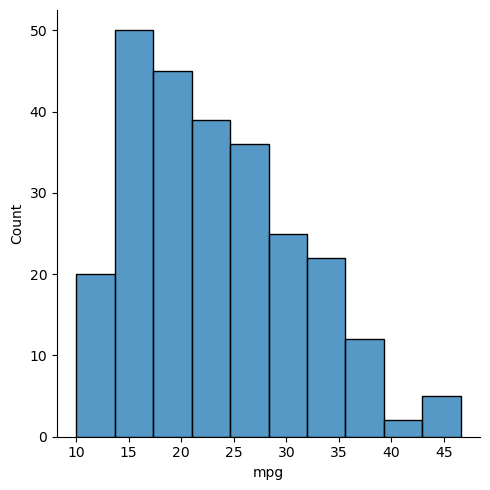

In [35]:
sns.displot(cars['mpg'])

In [36]:
cars.mpg.skew()

0.5895734404485251

In [37]:
cars.mpg.kurt()

-0.3444537099737688

In [38]:
var='mpg'
cars[cars[var]== cars[var].min()]

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
221,10.0,8.0,360,215.0,4615,14.0,1971,US.


In [39]:
var='mpg'
cars[cars[var]== cars[var].max()]

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
60,46.6,4.0,86,65.0,2110,18.0,1981,Japan.


In [40]:
var='brand'
cars[cars[var]== cars[var].min()].head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.
8,25.4,5.0,183,77.0,3530,20.0,1980,Europe.
11,34.3,4.0,97,78.0,2188,16.0,1981,Europe.
18,24.0,4.0,107,90.0,2430,15.0,1971,Europe.
20,21.5,4.0,121,110.0,2600,13.0,1978,Europe.


In [41]:
var='brand'
cars[cars[var]== cars[var].min()].head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.
8,25.4,5.0,183,77.0,3530,20.0,1980,Europe.
11,34.3,4.0,97,78.0,2188,16.0,1981,Europe.
18,24.0,4.0,107,90.0,2430,15.0,1971,Europe.
20,21.5,4.0,121,110.0,2600,13.0,1978,Europe.


In [42]:
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60',
       'year', 'brand'],
      dtype='object')

# 3)LM PLOT

### 3.1)Hp vs Mpg W/T Brand

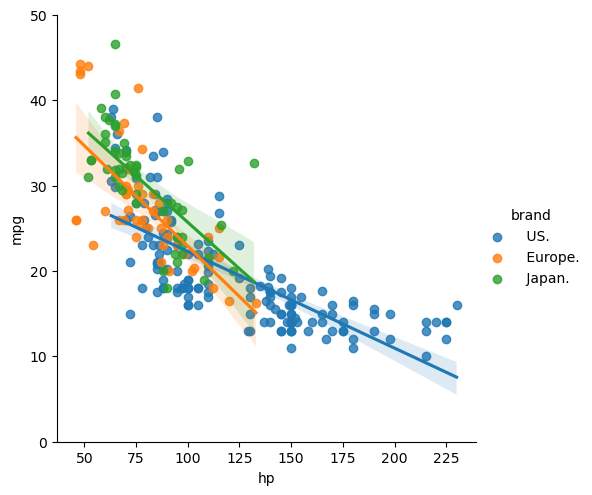

In [43]:
var = 'hp'
plot = sns.lmplot(var,'mpg',data=cars,hue='brand')
plot.set(ylim = (0,50))
plt.show()

### 3.2)Cylinders Vs Mpg W/T Brand

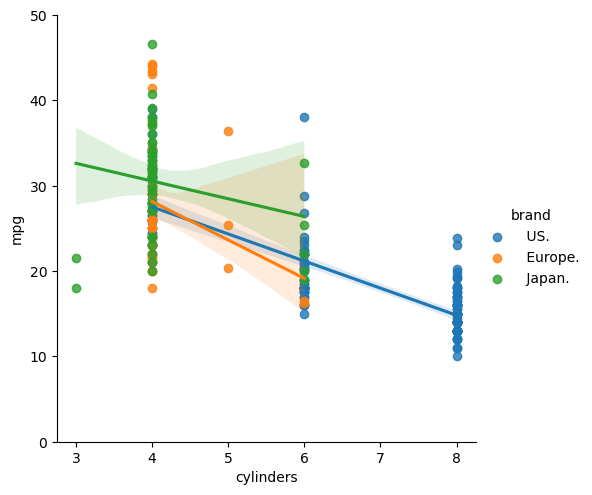

In [44]:
var = 'cylinders'
plot = sns.lmplot(var,'mpg',data=cars,hue='brand')
plot.set(ylim = (0,50))
plt.show()

### 3.3)Year Vs Mpg W/T Brand

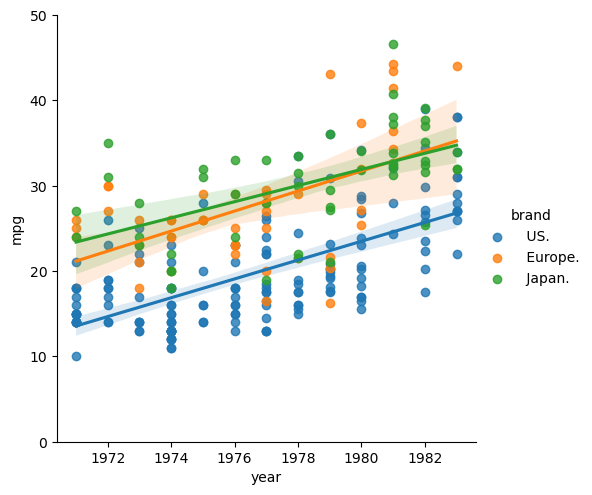

In [45]:
var = 'year'
plot = sns.lmplot(var,'mpg',data=cars,hue='brand')
plot.set(ylim = (0,50))
plt.show()

### 3.4)TimeTo60 Vs Mpg W/T Brand

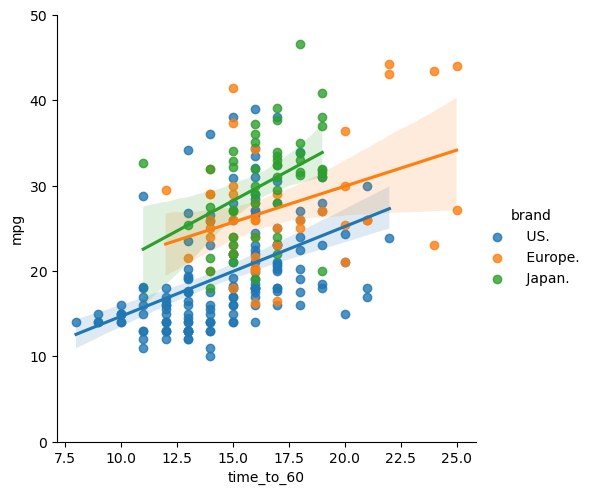

In [46]:
var = 'time_to_60'
plot = sns.lmplot(var,'mpg',data=cars,hue='brand')
plot.set(ylim = (0,50))
plt.show()

# 4)SCATTER PLOT

### 4.1)ALL COLUMNS W/T MPG

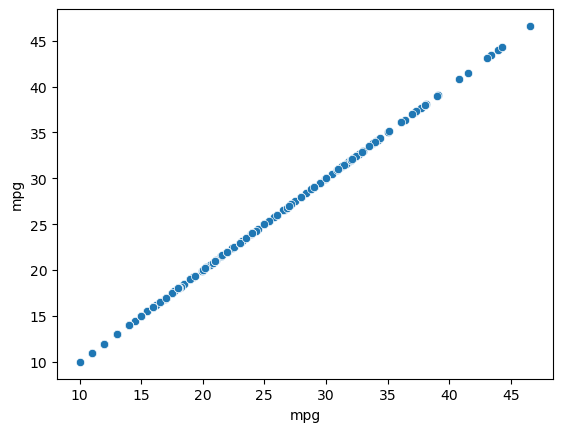

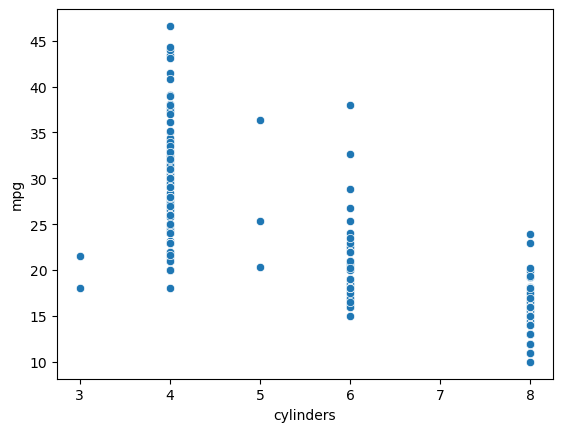

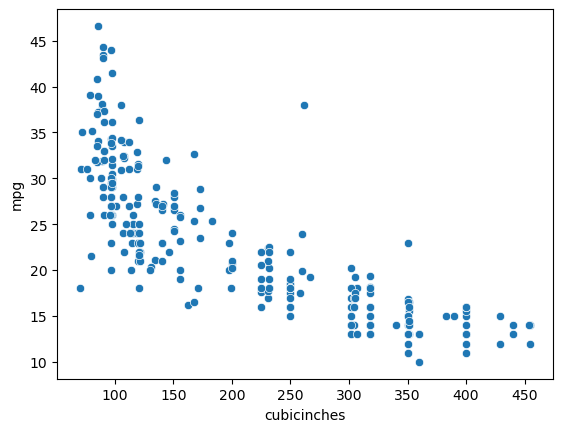

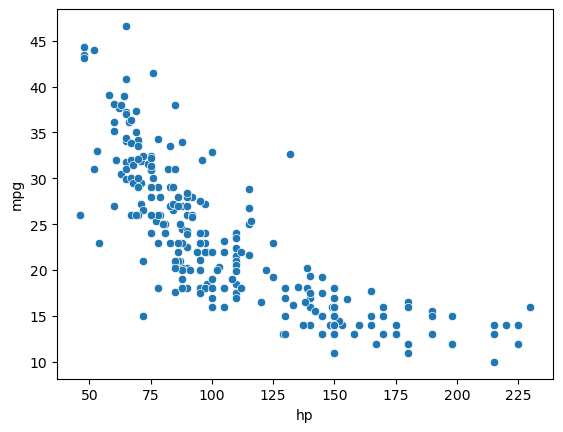

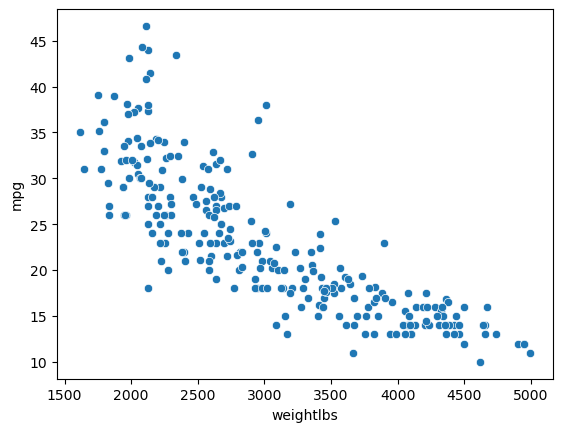

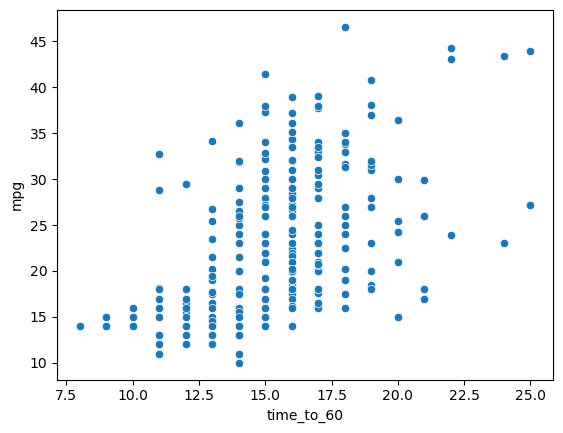

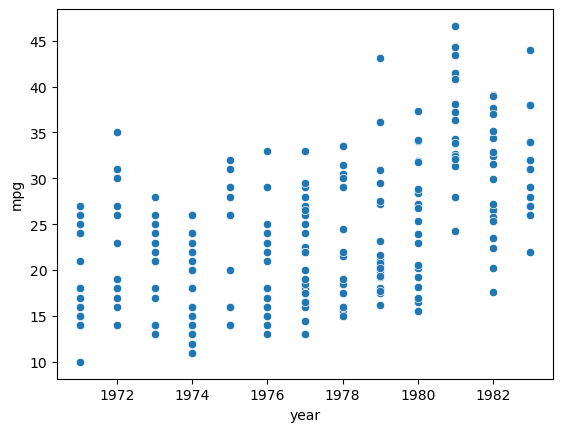

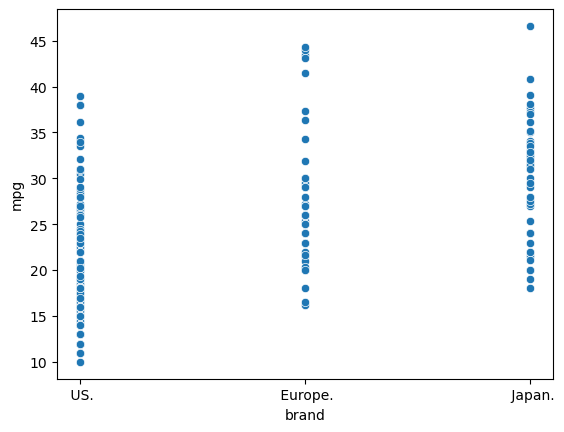

In [47]:
for col in cars.columns:
    sns.scatterplot(cars[col],cars['mpg'])
    plt.show()

## 5)DESCRIPTIVE STATISTICS

### 5.1)Correlation Using Spearman

In [48]:
cars.corr('spearman')

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year
mpg,1.000000,-0.833250,-0.871890,-0.866847,-0.878542,0.548539,0.552650
cylinders,-0.833250,1.000000,0.919888,0.832575,0.886674,-0.581452,-0.313142
cubicinches,-0.871890,0.919888,1.000000,0.891577,0.947248,-0.590002,-0.298195
hp,-0.866847,0.832575,0.891577,1.000000,0.888752,-0.729058,-0.368066
weightlbs,-0.878542,0.886674,0.947248,0.888752,1.000000,-0.498347,-0.261247
time_to_60,0.548539,-0.581452,-0.590002,-0.729058,-0.498347,1.000000,0.301331
year,0.552650,-0.313142,-0.298195,-0.368066,-0.261247,0.301331,1.000000


### 5.2)Correlation Using Kendall

In [49]:
cars.corr('kendall')

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year
mpg,1.000000,-0.695476,-0.697513,-0.694351,-0.694405,0.398859,0.395337
cylinders,-0.695476,1.000000,0.803105,0.699034,0.747822,-0.469132,-0.254989
cubicinches,-0.697513,0.803105,1.000000,0.733117,0.805208,-0.437316,-0.213493
hp,-0.694351,0.699034,0.733117,1.000000,0.710519,-0.568549,-0.262985
weightlbs,-0.694405,0.747822,0.805208,0.710519,1.000000,-0.346760,-0.181773
time_to_60,0.398859,-0.469132,-0.437316,-0.568549,-0.346760,1.000000,0.226005
year,0.395337,-0.254989,-0.213493,-0.262985,-0.181773,0.226005,1.000000


In [50]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8.0,350,165.0,4209,12.0,1972,US.
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.
2,17.0,8.0,302,140.0,3449,11.0,1971,US.
3,15.0,8.0,400,150.0,3761,10.0,1971,US.
4,30.5,4.0,98,63.0,2051,17.0,1978,US.


### 5.3)MEAN FOR  Mpg, Cylinders, Hp

In [51]:
cars[['mpg','cylinders','hp']].mean()

mpg           23.187109
cylinders      5.589844
hp           106.800781
dtype: float64

### 5.4)MEAN FOR Mpg,Cylinders,Year

In [52]:
cars[['mpg','cylinders','year']].mean()

mpg            23.187109
cylinders       5.589844
year         1976.828125
dtype: float64

### 5.5)MEAN FOR Hp,Timeto60

In [53]:
cars[['hp','time_to_60']].mean()

hp            106.800781
time_to_60     15.496094
dtype: float64

### 5.6)MEDIAN FOR Mpg, Cylinders, Hp

In [54]:
cars[['mpg','cylinders','hp']].median()

mpg          22.0
cylinders     5.0
hp           95.0
dtype: float64

### 5.7)MEDIAN FOR Mpg,Cylinders,Year

In [55]:
cars[['mpg','cylinders','year']].median()

mpg            22.0
cylinders       5.0
year         1977.0
dtype: float64

### 5.8)MEDIAN FOR Hp,Timeto60

In [56]:
cars[['hp','time_to_60']].median()

hp            95.0
time_to_60    16.0
dtype: float64


### 5.9)MODE FOR Mpg, Cylinders, Hp

In [57]:
cars[['mpg','cylinders','hp']].mode()

,mpg,cylinders,hp
0,14.0,4.0,150.0


### 5.10)MODE FOR Mpg,Cylinders,Year

In [58]:
cars[['mpg','cylinders','year']].mode()

,mpg,cylinders,year
0,14.0,4.0,1974


### 5.11)MODE FOR Hp,Timeto60

In [59]:
cars[['hp','time_to_60']].mode()

,hp,time_to_60
0,150.0,16.0


### 5.12)Range For The MP

In [60]:
max(cars['mpg'])-min(cars['mpg'])

36.6

### 5.13)RANGE FOR THE HP

In [61]:
max(cars['hp'])-min(cars['hp'])

184.0

### 5.14) Range For The CYLINDER

In [62]:
max(cars['cylinders'])-min(cars['cylinders'])

5.0

### 5.15)Describe ()

In [63]:
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,23.187109,5.589844,201.351562,106.800781,3006.445312,15.496094,1976.828125
std,7.870573,1.746631,109.572151,40.686792,855.572147,2.905030,3.635575
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.800000,4.000000,100.250000,75.000000,2245.750000,14.000000,1974.000000
50%,22.000000,5.000000,156.000000,95.000000,2832.500000,16.000000,1977.000000
75%,28.850000,8.000000,304.000000,139.000000,3666.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


### 5.15)Quantiles Range FOR HP

In [64]:
q = statistics.quantiles(cars['hp'])
q

[75.0, 95.0, 139.0]

### 5.16)InterQuantile Range For HP

In [65]:
q[2]-q[0]

64.0

### 5.17)Quantiles Range FOR Mpg

In [66]:
q1 = statistics.quantiles(cars['mpg'])
q1

[16.6, 22.0, 28.95]

### 5.18)InterQuantile Range For Mpg

In [67]:
q1[2]-q1[0]

12.349999999999998

### 5.19)Quantiles Range FOR Cylinders

In [68]:
q2 = statistics.quantiles(cars['cylinders'])
q2

[4.0, 5.0, 8.0]

### 5.20)InterQuantile Range For Cylinders

In [69]:
q2[2]-q2[0]

4.0

### 5.21)Quantiles Range FOR Cubicinches

In [70]:
q3 = statistics.quantiles(cars['cubicinches'])
q3

[98.75, 156.0, 304.0]

### 5.22)InterQuantile Range FOR Cubicinches

In [71]:
q3[2]-q3[0]

205.25

### 5.23)Quantiles Range FOR Weightlbs

In [72]:
q4 = statistics.quantiles(cars['weightlbs'])
q4

[2245.25, 2832.5, 3670.0]

### 5.24)InterQuantile Range FOR Weightlbs

In [73]:
q4[2]-q4[0]

1424.75

# 6)Add data visualizations/plots

## 6.a)BARPLOT

In [74]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8.0,350,165.0,4209,12.0,1972,US.
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.
2,17.0,8.0,302,140.0,3449,11.0,1971,US.
3,15.0,8.0,400,150.0,3761,10.0,1971,US.
4,30.5,4.0,98,63.0,2051,17.0,1978,US.


### 6.a.1)CYLINDER COUNTs

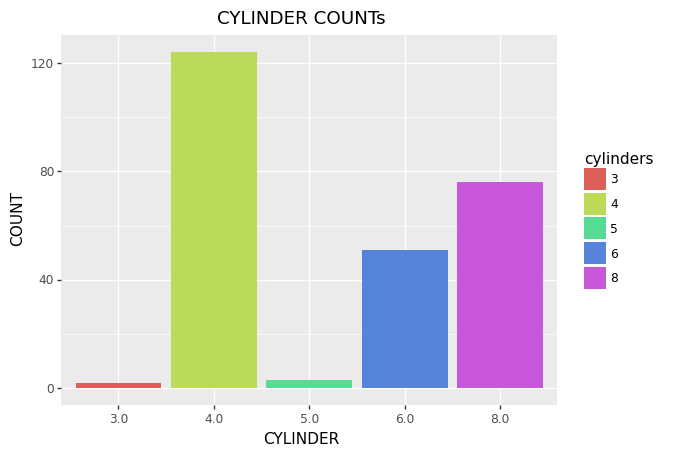

<ggplot: (382843486)>

In [75]:
(ggplot(cars,aes('factor(cylinders)',fill='factor(cylinders)')) +
  geom_bar(stat = 'count') +
  ggtitle('CYLINDER COUNTs') +
  xlab('CYLINDER') +
  ylab('COUNT') +
  labs(fill='cylinders'))

### 6.a.2)TimeTO60  By Cylinders

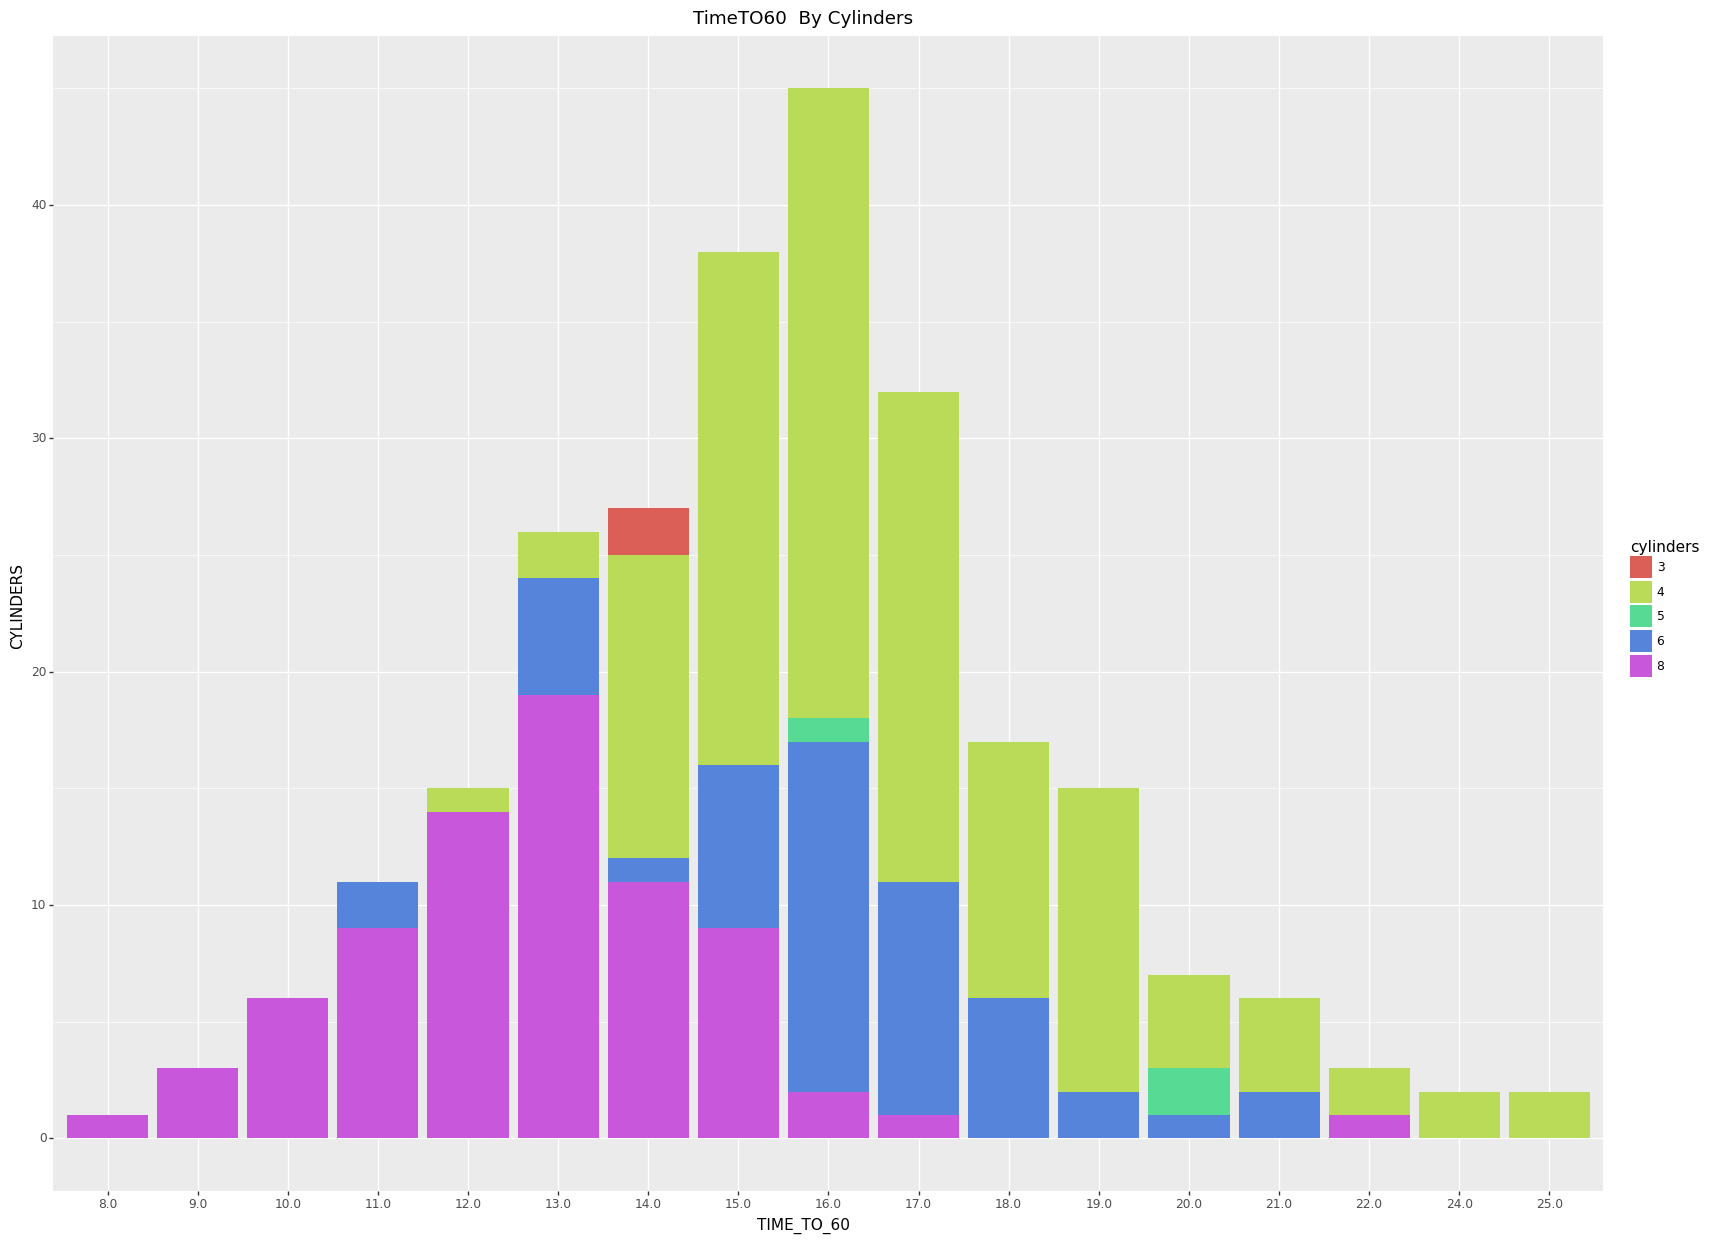

<ggplot: (382924816)>

In [76]:
(ggplot(cars,aes('factor(time_to_60)',fill='factor(cylinders)')) +
  geom_bar(stat = 'count') +
  ggtitle('TimeTO60  By Cylinders') +
  xlab('TIME_TO_60') +
  ylab('CYLINDERS') +
  labs(fill='cylinders')+
theme(figure_size=(20,15)))

### 6.a.3)Brand By Year

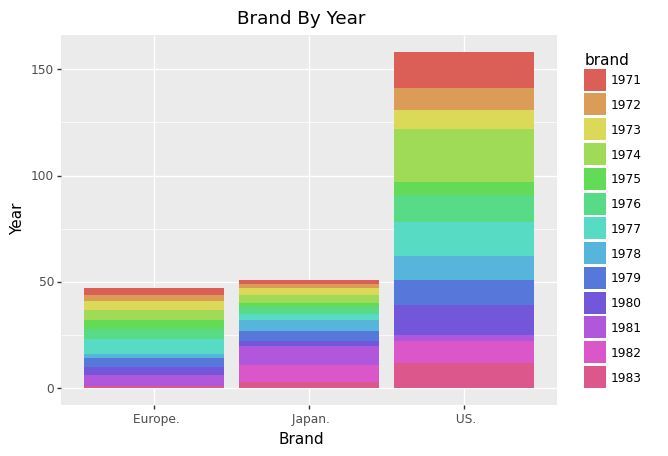

<ggplot: (382889469)>

In [77]:
(ggplot(cars,aes('brand',fill='factor(year)')) +
  geom_bar(stat = 'count') +
  ggtitle('Brand By Year') +
  xlab('Brand') +
  ylab('Year') +
  labs(fill='brand'))

# 6.b)BOXPLOT

### 6.b.1)CYLINDER BY MPG

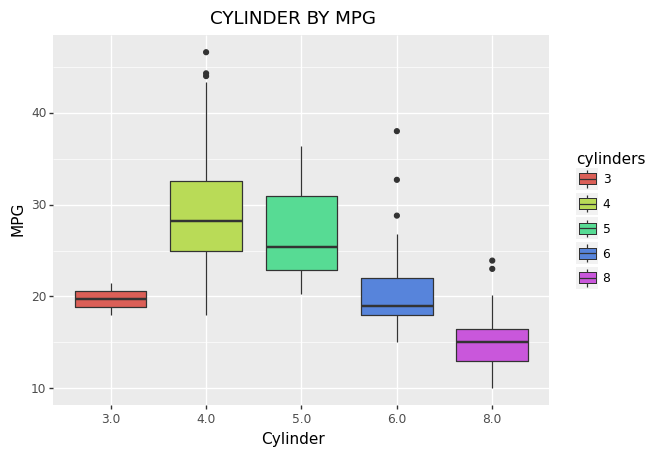

<ggplot: (382965815)>

In [78]:
(ggplot(cars,aes('factor(cylinders)','mpg',fill='factor(cylinders)')) +
  geom_boxplot() +
  xlab('Cylinder') +
  ylab('MPG') +
  ggtitle('CYLINDER BY MPG') +
  labs(fill='cylinders'))

### 6.b.2)Year By HP

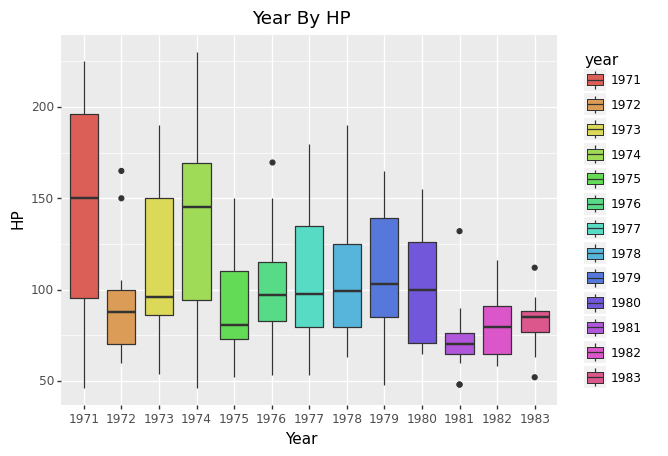

<ggplot: (382777850)>

In [79]:
(ggplot(cars,aes('factor(year)','hp',fill='factor(year)')) +
  geom_boxplot() +
  xlab('Year') +
  ylab('HP') +
  ggtitle('Year By HP') +
  labs(fill='year'))

### 6.b.3)Brand VS HP

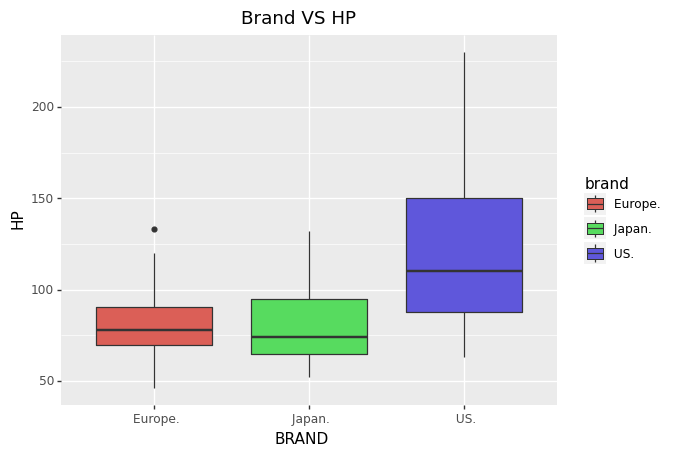

<ggplot: (383036022)>

In [80]:
(ggplot(cars,aes('factor(brand)','hp', fill = 'factor(brand)')) +
  geom_boxplot() +
  xlab("BRAND") +
  ylab("HP") +
  ggtitle("Brand VS HP ")+
labs(fill='brand'))

# 6.c)GEOMETRICAL POINT PLOT

### 6.c.1)WeightLBS Vs MPG

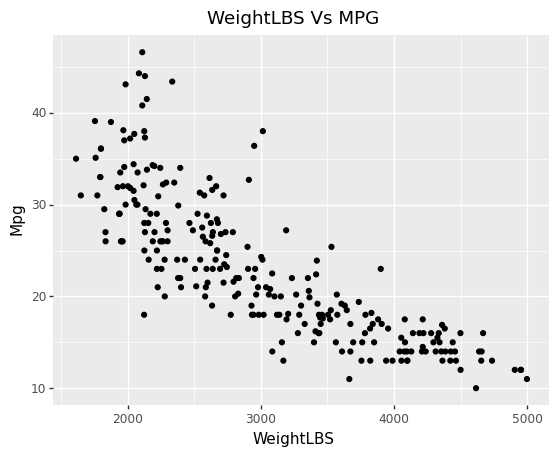

<ggplot: (383048888)>

In [81]:
(ggplot(cars,aes('weightlbs', 'mpg')) +
  geom_point() +
  xlab("WeightLBS") +
  ylab("Mpg") +
  ggtitle("WeightLBS Vs MPG"))

### 6.c.2)HP Vs MPG

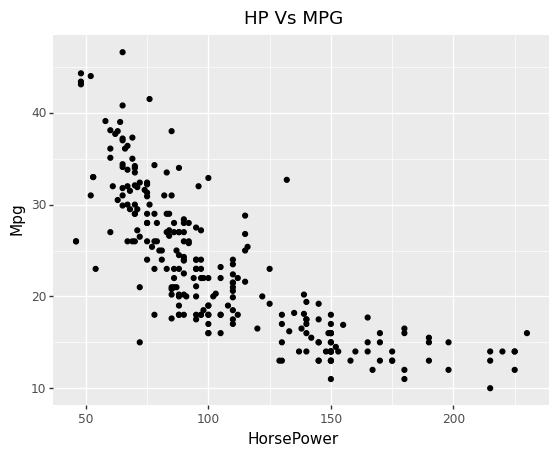

<ggplot: (383025270)>

In [82]:
(ggplot(cars,aes('hp', 'mpg')) +
  geom_point() +
  xlab("HorsePower") +
  ylab("Mpg") +
  ggtitle("HP Vs MPG"))

### 6.c.3)CubicInches VS HP

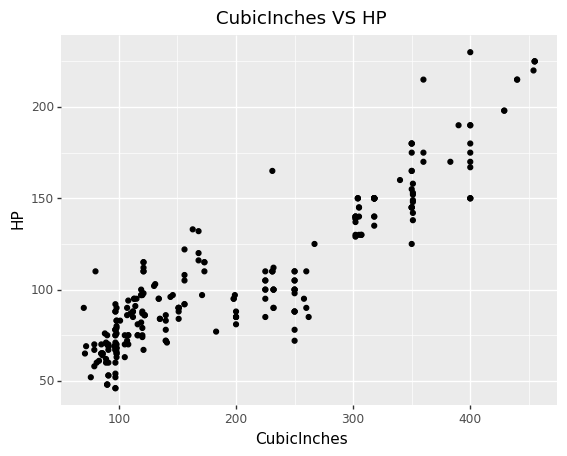

<ggplot: (383111699)>

In [83]:
(ggplot(cars,aes('cubicinches', 'hp')) +
  geom_point() +
  xlab("CubicInches") +
  ylab("HP") +
  ggtitle(" CubicInches VS HP "))

## 7)Statistical Tests

### 7.a.1)Correlation Coefficient

In [84]:
def check_normality(p_value):
    print("p value:%.4f" % p_value)
    if p_value<0.05:
        print('''>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian''')
    else:
        print('''>>Fail to reject null hypothesis 
>> The data is normally distributed 
>> Probably it is Gaussian")
''')

In [85]:
r,p = sps.pearsonr(cars.hp,cars.mpg)

In [86]:
print("correlation coefficient ",r)
print("the 𝑝-value is ",p)        

correlation coefficient  -0.7799539421859413
the 𝑝-value is  1.2796187903977095e-53


In [87]:
check_normality(p)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


### 7.a.2)Correlation Coefficient Matrix

In [88]:
result = sps.linregress(cars.weightlbs,cars.cylinders)
result.rvalue

0.8972474527089345

In [89]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8.0,350,165.0,4209,12.0,1972,US.
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.
2,17.0,8.0,302,140.0,3449,11.0,1971,US.
3,15.0,8.0,400,150.0,3761,10.0,1971,US.
4,30.5,4.0,98,63.0,2051,17.0,1978,US.


##  7.b)Noramlity Test

### 7.b.1)Sapiro Test For MPG,HP,WEIGHTLBS


#### 7.b.2)SAPIRO MPG

In [90]:
stats,p1 = sps.shapiro(cars['mpg'])
print("Statistics: "+ str(stats))
print("P Value: "+str(p1))

Statistics: 0.9552053809165955
P Value: 4.1501951386635483e-07


In [91]:
check_normality(p1)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


#### 7.b.2) SAPIRO HP

In [92]:
stats,p2 = sps.shapiro(cars['hp'])
print("Statistics: "+ str(stats))
print("P Value: "+str(p2))

Statistics: 0.9150906205177307
P Value: 6.914555733539274e-11


In [93]:
check_normality(p2)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


#### 7.b.3)SAPIRO WEIGHTLBS

In [94]:
stats,p3 = sps.shapiro(cars['weightlbs'])
print("Statistics: "+ str(stats))
print("P Value: "+str(p3))

Statistics: 0.947658896446228
P Value: 6.08805734714224e-08


In [95]:
check_normality(p3)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


### 7.c)kSTest For MPG,WEIGHTLBS,Cubicinches

#### 7.c.1)KS TEST FOR MPG

In [96]:
stats,ps1 = sps.kstest(cars['mpg'],'norm')
print("Statistics: "+ str(stats))
print("P Value: "+str(ps1))

Statistics: 1.0
P Value: 0.0


In [97]:
check_normality(ps1)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


#### 7.c.2)KS TEST FOR  WEIGHTLBS

In [98]:
stats,ps2 = sps.kstest(cars['weightlbs'],'norm')
print("Statistics: "+ str(stats))
print("P Value: "+str(ps2))

Statistics: 1.0
P Value: 0.0


In [99]:
check_normality(ps2)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


#### 7.c.3)KS TEST FOR Cubicinches

In [100]:
stats,ps3 = sps.kstest(cars['cubicinches'],'norm')
print("Statistics: "+ str(stats))
print("P Value: "+str(ps3))

Statistics: 1.0
P Value: 0.0


In [101]:
check_normality(ps3)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


## 7.d)Anderson Test For MPG,HP,WEIGHTLBS

#### 7.d.1)MPG

In [102]:
sample = sps.anderson(cars['mpg'])
sample

AndersonResult(statistic=3.142849122714779, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 7.d.2)HP

In [103]:
sample = sps.anderson(cars['hp'])
sample

AndersonResult(statistic=7.174983354954634, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 7.d.3)WeightLbs

In [104]:
sample = sps.anderson(cars['weightlbs'])
sample

AndersonResult(statistic=4.129859953657331, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## 7.e)Test for the equality of variances

#### 7.e.1)MEAN

In [105]:
stats,pl1 = sps.levene(cars[cars.brand == ' US.']['cylinders'],
           cars[cars.brand == ' Europe.']['cylinders'],
           cars[cars.brand == ' Japan.']['cylinders'],
           center='mean')
print("Statistics: "+ str(stats))
print("P Value: "+str(pl1))

Statistics: 97.9864333554985
P Value: 3.082505339138029e-32


In [106]:
check_normality(pl1)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


#### 7.e.2)MEDIAN

In [107]:
stats,pl2 = sps.levene(cars[cars.brand == ' US.']['cylinders'],
           cars[cars.brand == ' Europe.']['cylinders'],
           cars[cars.brand == ' Japan.']['cylinders'],
           center='median')
print("Statistics: "+ str(stats))
print("P Value: "+str(pl1))

Statistics: 76.62079711750427
P Value: 3.082505339138029e-32


In [108]:
check_normality(pl2)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


## 7.f)Two-sided Two Sample independent T test

In [109]:
stats,p = sps.ttest_ind(cars[cars.cylinders == 8.]['hp'],
                        cars[cars.cylinders == 5.]['hp'],
                        
                       ) 

In [110]:
cars.cylinders.unique()

array([8., 4., 5., 6., 3.])

In [111]:
print("Statistics: "+ str(stats))
print("P Value: "+str(p))

Statistics: 4.597836806990829
P Value: 1.6455010979298827e-05


In [112]:
check_normality(p)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


## 7.g)Chi squared test of independence

In [113]:
statistic,p_value,degree_of_freedom = sps.chi2_contingency(cars.hp,cars.mpg)[0:3]

In [114]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8.0,350,165.0,4209,12.0,1972,US.
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.
2,17.0,8.0,302,140.0,3449,11.0,1971,US.
3,15.0,8.0,400,150.0,3761,10.0,1971,US.
4,30.5,4.0,98,63.0,2051,17.0,1978,US.


In [115]:
print('statistic: '+ str(statistic),
      'p-value : '+ str(p_value),  
      'degree of freedom : '+str(degree_of_freedom))

statistic: 0.0 p-value : 1.0 degree of freedom : 0


In [116]:
print('statistic: '+ str(statistic),
      'p-value : '+ str(p_value),  
      'degree of freedom : '+str(degree_of_freedom))

statistic: 0.0 p-value : 1.0 degree of freedom : 0


In [117]:
check_normality(p)

p value:0.0000
>>Reject null hypothesis 
>> The data is not normally distributed 
>> Probably it is Not Guassian


## 7.h)PEARSONR , SPEARMANR , KENDALLTAU FOR CORRELATION

In [118]:
sps.pearsonr(cars.mpg,cars.hp)

(-0.7799539421859413, 1.2796187903977095e-53)

In [119]:
sps.spearmanr(cars.mpg,cars.hp)

SpearmanrResult(correlation=-0.8668467211006017, pvalue=9.640086155408407e-79)

In [120]:
sps.kendalltau(cars.mpg,cars.hp)

KendalltauResult(correlation=-0.6943507929338899, pvalue=2.463028212707961e-59)

## 8)LOGISTICS REGRESSION

In [121]:
cars.shape

(256, 8)

In [122]:
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60',
       'year', 'brand'],
      dtype='object')

In [123]:
cars.dtypes

mpg            float64
cylinders      float64
cubicinches      int64
hp             float64
weightlbs        int64
time_to_60     float64
year             int64
brand           object
dtype: object

In [124]:
cars.isnull().any()

mpg            False
cylinders      False
cubicinches    False
hp             False
weightlbs      False
time_to_60     False
year           False
brand          False
dtype: bool

In [125]:
pd.crosstab(cars['brand']==' US.',cars['mpg'])

mpg,10.0,11.0,12.0,13.0,14.0,14.5,15.0,15.5,16.0,16.2,...,38.1,39.0,39.1,40.8,41.5,43.1,43.4,44.0,44.3,46.6
brand,,,,,,,,,,,,,,,,,,,,,
False,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,1,1,1,1,1,1
True,1,2,4,13,16,1,10,2,11,0,...,0,1,0,0,0,0,0,0,0,0


In [126]:
pd.crosstab(cars['brand']==' US.',cars['cylinders'])

cylinders,3.0,4.0,5.0,6.0,8.0
brand,,,,,
False,2,86,3,7,0
True,0,38,0,44,76


In [127]:
pd.crosstab(cars['brand']==' US.',cars['hp'])

hp,46.0,48.0,52.0,53.0,54.0,58.0,60.0,61.0,62.0,63.0,...,167.0,170.0,175.0,180.0,190.0,198.0,215.0,220.0,225.0,230.0
brand,,,,,,,,,,,,,,,,,,,,,
False,2,3,2,2,1,1,4,1,1,0,...,0,0,0,0,0,0,0,0,0,0
True,0,0,0,0,0,0,0,0,0,2,...,1,3,3,4,3,2,3,1,3,1


In [128]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8.0,350,165.0,4209,12.0,1972,US.
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.
2,17.0,8.0,302,140.0,3449,11.0,1971,US.
3,15.0,8.0,400,150.0,3761,10.0,1971,US.
4,30.5,4.0,98,63.0,2051,17.0,1978,US.


### 8.1)BINARY VARIABLE ASSUMPTION

In [129]:
cars['America'] = 0

In [130]:
cars.America[cars['brand']==' US.'] = 1

In [131]:
cars['Europe'] = 0

In [132]:
cars.Europe[cars['brand']==' Europe.'] = 1

In [133]:
cars['Japan'] = 0

In [134]:
cars.Japan[cars['brand']== ' Japan.']=1

In [135]:
cars['TimeAbove_10']=0

In [136]:
cars.TimeAbove_10[cars['time_to_60']>10.]=1

In [137]:
cars.time_to_60.unique()

array([12., 14., 11., 10., 17., 13.,  9., 20., 16., 15., 19., 18., 21.,
       25.,  8., 24., 22.])

In [138]:
cars['YearAbove_80s']=0

In [139]:
cars.YearAbove_80s[cars['year']>1980]=1

In [140]:
cars['CubicinchesAbove150s']=0

In [141]:
cars.CubicinchesAbove150s[cars['CubicinchesAbove150s']>150]=1

In [142]:
cars['WgtAbov2500s']=0

In [143]:
cars.WgtAbov2500s[cars['WgtAbov2500s']>2500]=1

In [144]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand,America,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s
0,14.0,8.0,350,165.0,4209,12.0,1972,US.,1,0,0,1,0,0,0
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.,0,1,0,1,0,0,0
2,17.0,8.0,302,140.0,3449,11.0,1971,US.,1,0,0,1,0,0,0
3,15.0,8.0,400,150.0,3761,10.0,1971,US.,1,0,0,0,0,0,0
4,30.5,4.0,98,63.0,2051,17.0,1978,US.,1,0,0,1,0,0,0


# 8.a)LOGISTIC REGRESSION MODEL

### 8.a.1)MODEL 1 using Logistic Regression

In [145]:
model1 = smf.logit("America ~ C(cylinders)",data=cars).fit()
model1.summary()

         Current function value: 0.378165
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.4317
Time:                        19:02:52   Log-Likelihood:                -96.810
converged:                      False   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                 8.611e-31
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -23.0243   7.07e+04     -0.000      1.000   -1.39e+05    1.38e+05
C(cylinders)[T.4.0]    22.2076   7.07e+04      0.000      1.000   -1.38e+05    1.39e+05
C(cylinders)[T.5.0]    -9.2597   5.91e+06  -1.57e-06      1.000   -1.16e+07    1.16e+07
C(cylinders)[T.6.0]    24.8626   7.07e+04      0.000      1.000   -1.38e+05    1.39e+05
C(cylinders)[T.8.0]    45.3631   7.11e+04      0.001      0.999   -1.39e+05    1.39e+05
=======================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 8.a.2)MODEL 2 using Logistic Regression

In [146]:
model2 = smf.logit("America ~ C(year)",data=cars).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.622737
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                           12
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                 0.06415
Time:                        19:02:52   Log-Likelihood:                -159.42
converged:                       True   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                   0.03917
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2238      0.509      2.405      0.016       0.227       2.221
C(year)[T.1972]    -0.5306      0.748     -0.710      0.478      -1.996       0.935
C(year)[T.1973]    -0.9725      0.716     -1.358      0.174      -2.376       0.431
C(year)[T.1974]    -0.2021      0.640     -0.316      0.752      -1.457       1.053
C(year)[T.1975]    -1.2238      0.770     -1.590      0.112      -2.732       0.284
C(year)[T.1976]    -0.7383      0.679     -1.088      0.277      -2.069       0.592
C(year)[T.1977]    -0.7538      0.649     -1.161      0.246      -2.026       0.518
C(year)[T.1978]    -0.7718      0.702     -1.100      0.271      -2.147       0.604
C(year)[T.1979]    -0.9361      0.673     -1.390      0.164      -2.256       0.383
C(year)[T.1980]    -0.3765      0.705     -0.534      0.593      -1.758       1.005
C(year)[T.1981]    -2.7642      0.815     -3.393      0.001      -4.361      -1.168
C(year)[T.1982]    -1.0006      0.696     -1.439      0.150      -2.364       0.363
C(year)[T.1983]    -0.1252      0.770     -0.163      0.871      -1.633       1.383
===================================================================================
"""

### 8.a.3)MODEL 3 using Logistic Regression

In [147]:
model3 = smf.logit("America ~ C(Europe)",data=cars).fit()
model3.summary()

         Current function value: 0.453651
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.3183
Time:                        19:02:52   Log-Likelihood:                -116.13
converged:                      False   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                 2.166e-25
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1308      0.161      7.021      0.000       0.815       1.446
C(Europe)[T.1]   -33.1641   1.32e+06  -2.52e-05      1.000   -2.58e+06    2.58e+06
==================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 8.a.4)MODEL 4 using Logistic Regression

In [148]:
model4 = smf.logit("America ~ C(Japan)",data=cars).fit()
model4.summary()

         Current function value: 0.431133
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.3521
Time:                        19:02:52   Log-Likelihood:                -110.37
converged:                      False   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                 6.465e-28
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2124      0.166      7.297      0.000       0.887       1.538
C(Japan)[T.1]   -25.2971   2.38e+04     -0.001      0.999   -4.66e+04    4.66e+04
=================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 8.a.5)MODEL 5 using Logistic Regression

In [149]:
model5 = smf.logit("America ~ C(TimeAbove_10)",data=cars).fit()
model5.summary()

         Current function value: 0.646083
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                 0.02907
Time:                        19:02:52   Log-Likelihood:                -165.40
converged:                      False   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                  0.001651
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.1459    615.021      0.025      0.980   -1190.272    1220.564
C(TimeAbove_10)[T.1]   -14.7337    615.021     -0.024      0.981   -1220.152    1190.684
========================================================================================
"""

### 8.a.6)MODEL 6 using Logistic Regression

In [150]:
model6 = smf.logit("America ~ C(YearAbove_80s)",data=cars).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.657115
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                 0.01249
Time:                        19:02:52   Log-Likelihood:                -168.22
converged:                       True   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                   0.03915
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6137      0.146      4.194      0.000       0.327       0.900
C(YearAbove_80s)[T.1]    -0.6529      0.316     -2.066      0.039      -1.272      -0.034
=========================================================================================
"""

### 8.a.7)MODEL 7 using Logistic Regression

In [151]:
model7 = smf.logit("America ~ C(CubicinchesAbove150s)",data=cars).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.665424
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      255
Method:                           MLE   Df Model:                            0
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:               1.159e-12
Time:                        19:02:52   Log-Likelihood:                -170.35
converged:                       True   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4776      0.129      3.715      0.000       0.226       0.730
==============================================================================
"""

### 8.a.8)MODEL 8 using Logistic Regression

In [152]:
model8 = smf.logit("America ~ C(WgtAbov2500s)",data=cars).fit()
model8.summary()

Optimization terminated successfully.
         Current function value: 0.665424
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      255
Method:                           MLE   Df Model:                            0
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:               1.159e-12
Time:                        19:02:52   Log-Likelihood:                -170.35
converged:                       True   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4776      0.129      3.715      0.000       0.226       0.730
==============================================================================
"""

### 8.a.9)MODEL 9 using Logistic Regression

In [153]:
model9 = smf.logit("America ~ C(weightlbs)",data=cars).fit()
model9.summary()

         Current function value: 0.032492
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                          236
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.9512
Time:                        19:02:52   Log-Likelihood:                -8.3179
converged:                      False   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                 0.0001229
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -14.7478   1593.814     -0.009      0.993   -3138.566    3109.070
C(weightlbs)[T.1649]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1755]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1760]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1773]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1795]    -9.1933   1.12e+05  -8.23e-05      1.000   -2.19e+05    2.19e+05
C(weightlbs)[T.1800]    14.7478   1593.815      0.009      0.993   -3109.072    3138.567
C(weightlbs)[T.1825]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1834]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1835]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1875]    29.7615   2419.607      0.012      0.990   -4712.581    4772.104
C(weightlbs)[T.1925]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1937]    -9.1933   1.12e+05  -8.23e-05      1.000   -2.19e+05    2.19e+05
C(weightlbs)[T.1940]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1945]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1950]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1955]    23.6523   1596.124      0.015      0.988   -3104.693    3151.997
C(weightlbs)[T.1963]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1965]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1968]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.1975]    -9.1933   1.12e+05  -8.23e-05      1.000   -2.19e+05    2.19e+05
C(weightlbs)[T.1985]    -9.1933   1.12e+05  -8.23e-05      1.000   -2.19e+05    2.19e+05
C(weightlbs)[T.2003]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.2019]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.2020]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.2045]    14.7478   1593.815      0.009      0.993   -3109.072    3138.567
C(weightlbs)[T.2050]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.2051]    34.4329   1.89e+04      0.002      0.999    -3.7e+04     3.7e+04
C(weightlbs)[T.2065]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.2074]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.2075]    34.4329   1.89e+04      0.002      0.999    -3.7e+04     3.7e+04
C(weightlbs)[T.2085]   -12.0987   6.76e+05  -1.79e-05      1.000   -1.32e+06    1.32e+06
C(weightlbs)[T.2110]    -9.1933   1.12e+05  -8.23e-05      1.000   -2.19e+05    2.19e+05
C(weightlbs)[T.2120]    34.4329   1.8

In [154]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand,America,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s
0,14.0,8.0,350,165.0,4209,12.0,1972,US.,1,0,0,1,0,0,0
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.,0,1,0,1,0,0,0
2,17.0,8.0,302,140.0,3449,11.0,1971,US.,1,0,0,1,0,0,0
3,15.0,8.0,400,150.0,3761,10.0,1971,US.,1,0,0,0,0,0,0
4,30.5,4.0,98,63.0,2051,17.0,1978,US.,1,0,0,1,0,0,0


## 8.b)TESTPRED PREDICATION

In [155]:
testpred = cars.drop('America',axis=1).copy()

In [156]:
testpred[[
      'cylinders',
      
      
      'time_to_60',
      
      
    'Europe',
          'Japan',
          'TimeAbove_10',
          'YearAbove_80s',
          'CubicinchesAbove150s',
          'WgtAbov2500s'
          ]] = testpred[[
    
      'cylinders',
      
      
      'time_to_60',
      
    'Europe',
          'Japan',
          'TimeAbove_10',
          'YearAbove_80s',
          'CubicinchesAbove150s',
          'WgtAbov2500s'
         
          ]] .astype(str)

In [157]:
hec =  preprocessing.OneHotEncoder()

In [158]:
hec

OneHotEncoder()

## 8.b.1)TESTPRED CATEGORICAL PREDICTION

In [159]:
testpredc =  hec.fit_transform( testpred[[
     'cylinders',
      
      
      'time_to_60',
      
    'Europe',
          'Japan',
          'TimeAbove_10',
          'YearAbove_80s',
          'CubicinchesAbove150s',
          'WgtAbov2500s'
          ]] .astype(str))

In [160]:
testpredc  = pd.DataFrame.sparse.from_spmatrix(testpredc)

In [161]:
testpred

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s
0,14.0,8.0,350,165.0,4209,12.0,1972,US.,0,0,1,0,0,0
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.,1,0,1,0,0,0
2,17.0,8.0,302,140.0,3449,11.0,1971,US.,0,0,1,0,0,0
3,15.0,8.0,400,150.0,3761,10.0,1971,US.,0,0,0,0,0,0
4,30.5,4.0,98,63.0,2051,17.0,1978,US.,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,17.0,8.0,305,130.0,3840,15.0,1980,US.,0,0,1,0,0,0
252,36.1,4.0,91,60.0,1800,16.0,1979,Japan.,0,1,1,0,0,0
253,22.0,6.0,232,112.0,2835,15.0,1983,US.,0,0,1,1,0,0
254,18.0,6.0,232,100.0,3288,16.0,1972,US.,0,0,1,0,0,0


In [162]:
testpredc

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
252,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
253,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
254,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


## 8.b.2)NUMERICAL PREDICTION

In [163]:
testpredN = testpred.drop([
      
      'cylinders',
      'brand',
      
      'time_to_60',
      
    'Europe',
          'Japan',
          'TimeAbove_10',
          'YearAbove_80s',
          'CubicinchesAbove150s',
          'WgtAbov2500s'
    ], axis = 1)

In [164]:
testpredN

,mpg,cubicinches,hp,weightlbs,year
0,14.0,350,165.0,4209,1972
1,31.9,89,71.0,1925,1980
2,17.0,302,140.0,3449,1971
3,15.0,400,150.0,3761,1971
4,30.5,98,63.0,2051,1978
...,...,...,...,...,...
251,17.0,305,130.0,3840,1980
252,36.1,91,60.0,1800,1979
253,22.0,232,112.0,2835,1983
254,18.0,232,100.0,3288,1972


## 8.b.3)Categorical Prediction Using Logistic Regression

In [165]:
testpredCL = hec.fit_transform(testpred[[
       'Europe',
    'brand',
    'Japan',
    'TimeAbove_10',
    'YearAbove_80s' ,
'CubicinchesAbove150s',
          'WgtAbov2500s']].astype(str))

In [166]:
testpredCL = pd.DataFrame.sparse.from_spmatrix(testpredCL)

In [167]:
testpredCL

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
252,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
253,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
254,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


### 8.b.4)NUMERICAL PREDICTION USING LOGISTIC REGRESSION

In [168]:
testpredNL = testpred[['hp','year']]

In [169]:
testpredNL

,hp,year
0,165.0,1972
1,71.0,1980
2,140.0,1971
3,150.0,1971
4,63.0,1978
...,...,...
251,130.0,1980
252,60.0,1979
253,112.0,1983
254,100.0,1972


In [170]:
testpred = pd.concat([testpredc, testpredN], axis = 1)

In [171]:
testpred

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,mpg,cubicinches,hp,weightlbs,year
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,14.0,350,165.0,4209,1972
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,31.9,89,71.0,1925,1980
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,17.0,302,140.0,3449,1971
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,15.0,400,150.0,3761,1971
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,30.5,98,63.0,2051,1978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,17.0,305,130.0,3840,1980
252,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,36.1,91,60.0,1800,1979
253,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,22.0,232,112.0,2835,1983
254,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,18.0,232,100.0,3288,1972


### 8.b.5)TESTPREDICTION USING LOGOSTIC REGRESSION

In [172]:
testpredL = pd.concat([testpredCL, testpredNL], axis = 1)

In [173]:
testpredL

,0,1,2,3,4,5,6,7,8,9,10,11,12,hp,year
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,165.0,1972
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,71.0,1980
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,140.0,1971
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,150.0,1971
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,63.0,1978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,130.0,1980
252,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,60.0,1979
253,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,112.0,1983
254,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,100.0,1972


## 8.b.6)RESPONSIVE VARIABLE

In [174]:
Resp = cars.America.copy()

In [175]:
Resp

0      1
1      0
2      1
3      1
4      1
      ..
251    1
252    0
253    1
254    1
255    1
Name: America, Length: 256, dtype: int64

### 8.b.7) Logistic Fit Model

In [176]:
lrcl = LogisticRegression().fit(testpredL.to_numpy(),Resp.to_numpy())

In [177]:
pl = lrcl.predict(testpredL.to_numpy())

In [178]:
pl

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

## 8.c)ACCURACY

In [179]:
acc = skm.accuracy_score(Resp,pl)

In [180]:
acc*100

100.0

## 8.d)CONFUSION MATRIX


In [181]:
conf = skm.confusion_matrix(Resp,pl)

In [182]:
conf

array([[ 98,   0],
       [  0, 158]])

In [183]:
ppl = lrcl.predict_proba(testpredL.to_numpy())

In [184]:
ppl.shape

(256, 2)

In [185]:
pl2 = np.repeat(0,256)

In [186]:
pl2[ppl[:,1]>=.5]=1

In [187]:
pl2

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [188]:
acc2 = skm.accuracy_score(Resp,pl2)

In [189]:
acc2*100

100.0

In [190]:
pl3 = np.repeat(0,256)

In [191]:
pl3[ppl[:,1]>=.45] = 1 

In [192]:
acc3 = skm.accuracy_score(Resp,pl3)

In [193]:
acc3*100

100.0

In [194]:
print('Accuracy 1 for Prediction ',acc*100)
print( 'Accuracy 2 for Prediction ',acc2*100)
print('Accuracy 3 for Prediction ',acc3*100)

Accuracy 1 for Prediction  100.0
Accuracy 2 for Prediction  100.0
Accuracy 3 for Prediction  100.0


# 8.e)Cumulative Prob Plot And Lift

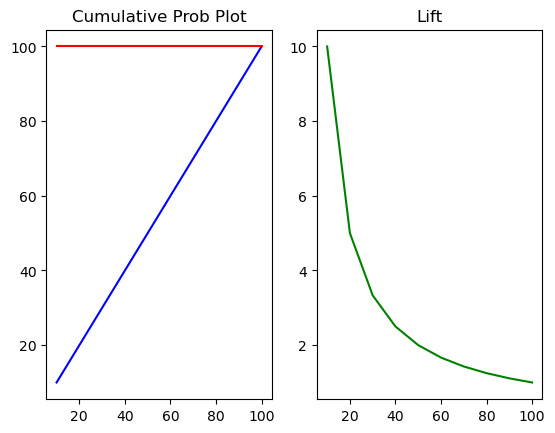

In [195]:
deciles = list(range(10,101,10))
obs = [0]*10
cumu = [0]*10
lift = [0]*10

for i in range(1,11):
    obs[i-1]=round(1000*i)

for i,j in enumerate(obs):
    cumu[i] = (cars.America[0:j].sum()/cars.America.sum())*100

for i in range(10):
    lift[i]=cumu[i]/deciles[i]
    
fig, axs = plt.subplots(1,2)

axs[0].plot(deciles, deciles, color='b')
axs[0].plot(deciles,cumu,color='r')

axs[0].set_title('Cumulative Prob Plot')

axs[1].plot(deciles, lift, color='g')

axs[1].set_title('Lift')

plt.show()

# 9)Decision Tree

In [196]:
dtcl = tree.DecisionTreeClassifier()
dtcl = dtcl.fit(testpred,Resp)
dot_data = tree.export_graphviz(dtcl,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("cars",view=True)

dtp = dtcl.predict(testpred) 

acc_dc = skm.accuracy_score(Resp,dtp) 

# 10)XGBOOST CLASSIFIER

In [197]:
xgbcl = xgb.XGBClassifier(objective = "binary:logistic")

xgbcl.fit(testpred,Resp)
p = xgbcl.predict(testpred) # predict classification
pp = xgbcl.predict_proba(testpred) # predict probabilties

accx = skm.accuracy_score(Resp,p)
confx = skm.confusion_matrix(Resp,p)

[19:02:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [198]:
confx

array([[ 98,   0],
       [  0, 158]])

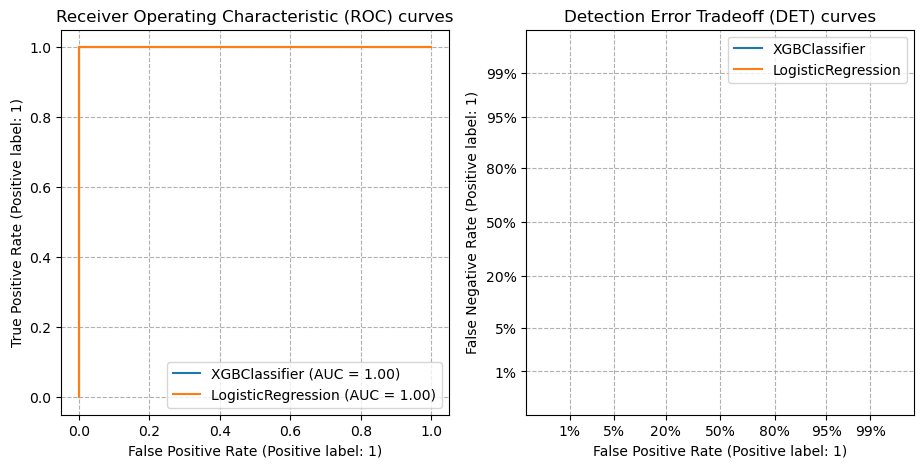

In [199]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

skm.RocCurveDisplay.from_estimator(xgbcl, testpred, Resp, ax=ax_roc)
skm.DetCurveDisplay.from_estimator(xgbcl, testpred, Resp, ax=ax_det)

skm.RocCurveDisplay.from_estimator(lrcl, testpredL.to_numpy(), Resp.to_numpy(), ax=ax_roc)
skm.DetCurveDisplay.from_estimator(lrcl, testpredL.to_numpy(), Resp.to_numpy(), ax=ax_det)
                          

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

# 11)LINEAR REGRESSION


In [200]:
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60',
       'year', 'brand', 'America', 'Europe', 'Japan', 'TimeAbove_10',
       'YearAbove_80s', 'CubicinchesAbove150s', 'WgtAbov2500s'],
      dtype='object')

### 11.a)STATISCAL ANALYSIS

In [201]:
cars.groupby('mpg').mean()

,cylinders,cubicinches,hp,weightlbs,time_to_60,year,America,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s
mpg,,,,,,,,,,,,,
10.0,8.0,360.000000,215.000000,4615.000000,14.000000,1971.000000,1.0,0.0,0.0,1.0000,0.0,0.0,0.0
11.0,8.0,375.000000,165.000000,4330.500000,12.500000,1974.000000,1.0,0.0,0.0,1.0000,0.0,0.0,0.0
12.0,8.0,408.500000,192.500000,4827.000000,12.250000,1974.000000,1.0,0.0,0.0,1.0000,0.0,0.0,0.0
13.0,8.0,354.307692,160.153846,4120.307692,12.615385,1974.692308,1.0,0.0,0.0,1.0000,0.0,0.0,0.0
14.0,8.0,361.000000,169.562500,4149.062500,12.250000,1972.875000,1.0,0.0,0.0,0.6875,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.1,4.0,90.000000,48.000000,1985.000000,22.000000,1979.000000,0.0,1.0,0.0,1.0000,0.0,0.0,0.0
43.4,4.0,90.000000,48.000000,2335.000000,24.000000,1981.000000,0.0,1.0,0.0,1.0000,1.0,0.0,0.0
44.0,4.0,97.000000,52.000000,2130.000000,25.000000,1983.000000,0.0,1.0,0.0,1.0000,1.0,0.0,0.0


In [202]:
cars.groupby('mpg').median()

,cylinders,cubicinches,hp,weightlbs,time_to_60,year,America,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s
mpg,,,,,,,,,,,,,
10.0,8.0,360.0,215.0,4615.0,14.0,1971.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11.0,8.0,375.0,165.0,4330.5,12.5,1974.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12.0,8.0,414.5,189.0,4928.5,12.5,1974.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
13.0,8.0,350.0,150.0,4098.0,13.0,1974.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
14.0,8.0,345.0,151.5,4223.0,12.5,1973.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.1,4.0,90.0,48.0,1985.0,22.0,1979.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
43.4,4.0,90.0,48.0,2335.0,24.0,1981.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
44.0,4.0,97.0,52.0,2130.0,25.0,1983.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [203]:
cars.groupby('mpg').corr()

cylinders  cubicinches  hp  weightlbs  time_to_60  \
mpg                                                                            
10.0 cylinders                   NaN          NaN NaN        NaN         NaN   
     cubicinches                 NaN          NaN NaN        NaN         NaN   
     hp                          NaN          NaN NaN        NaN         NaN   
     weightlbs                   NaN          NaN NaN        NaN         NaN   
     time_to_60                  NaN          NaN NaN        NaN         NaN   
...                              ...          ...  ..        ...         ...   
46.6 Japan                       NaN          NaN NaN        NaN         NaN   
     TimeAbove_10                NaN          NaN NaN        NaN         NaN   
     YearAbove_80s               NaN          NaN NaN        NaN         NaN   
     CubicinchesAbove150s        NaN          NaN NaN        NaN         NaN   
     WgtAbov2500s                NaN          NaN NaN        NaN         NaN   

                           year  America  Europe  Japan  TimeAbove_10  \
mpg                                                                     
10.0 cylinders              NaN      NaN     NaN    NaN           NaN   
     cubicinches            NaN      NaN     NaN    NaN           NaN   
     hp                     NaN      NaN     NaN    NaN           NaN   
     weightlbs              NaN      NaN     NaN    NaN           NaN   
     time_to_60             NaN      NaN     NaN    NaN           NaN   
...                         ...      ...     ...    ...           ...   
46.6 Japan                  NaN      NaN     NaN    NaN           NaN   
     TimeAbove_10           NaN      NaN     NaN    NaN           NaN   
     YearAbove_80s          NaN      NaN     NaN    NaN           NaN   
     CubicinchesAbove150s   NaN      NaN     NaN    NaN           NaN   
     WgtAbov2500s           NaN      NaN     NaN    NaN           NaN   

                           YearAbove_80s  CubicinchesAbove150s  WgtAbov2500s  
mpg                                                                           
10.0 cylinders                       NaN                   NaN           NaN  
     cubicinches                     NaN                   NaN           NaN  
     hp                              NaN                   NaN           NaN  
     weightlbs                       NaN                   NaN           NaN  
     time_to_60                      NaN                   NaN           NaN  
...                                  ...                   ...           ...  
46.6 Japan                           NaN                   NaN           NaN  
     TimeAbove_10                    NaN                   NaN           NaN  
     YearAbove_80s                   NaN                   NaN           NaN  
     CubicinchesAbove150s            NaN                   NaN           NaN  
     WgtAbov2500s                    NaN                   NaN           NaN  

[1313 rows x 13 columns]

## 11.b)Linear Regression Graph 

## 11.b.1)HorsePower By Mpg

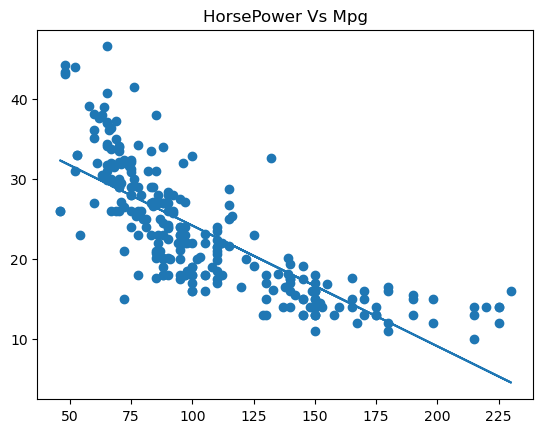

In [204]:
x= cars.hp
y= cars.mpg
slope,intercept,r,p,std_err=sps.linregress(x,y)

def myfunc(x):
  return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.title('HorsePower Vs Mpg')
plt.show()

## 11.b.2)Weight By Mpg

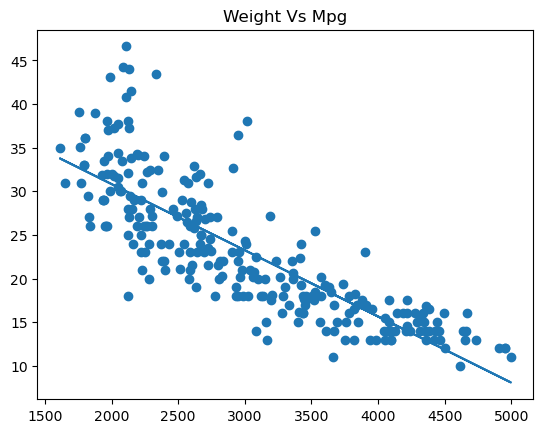

In [205]:
x=cars.weightlbs
y=cars.mpg
slope,intercept,r,p,std_err=sps.linregress(x,y)

def myfunc(x):
  return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.title('Weight Vs Mpg')
plt.show()

## 11.b.3)Cubicinche By Mpg

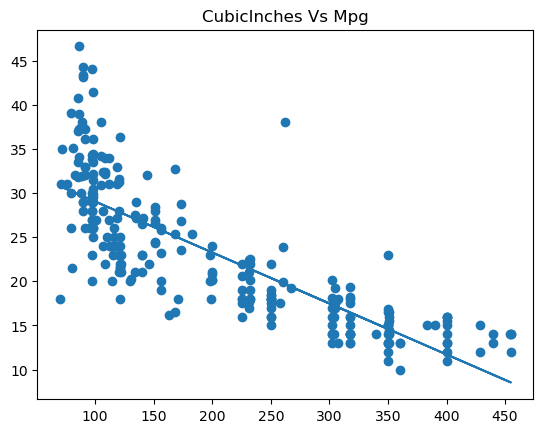

In [206]:
x= cars.cubicinches
y= cars.mpg
slope,intercept,r,p,std_err=sps.linregress(x,y)

def myfunc(x):
  return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.title('CubicInches Vs Mpg')
plt.show()

## 11.b.4)HorsePower By Mpg

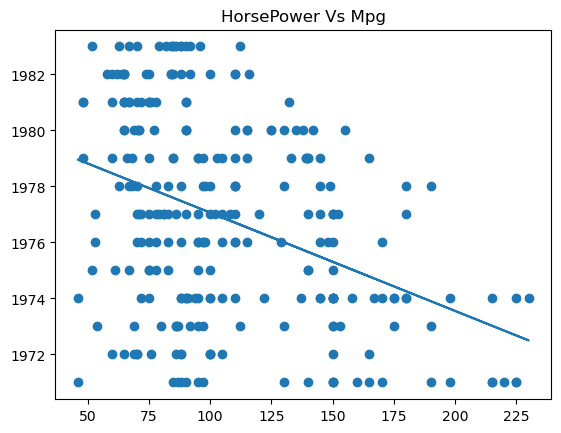

In [207]:
x= cars.hp
y= cars.year
slope,intercept,r,p,std_err=sps.linregress(x,y)

def myfunc(x):
  return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.title('HorsePower Vs Mpg')
plt.show()

## 11.b.5)America By Mpg

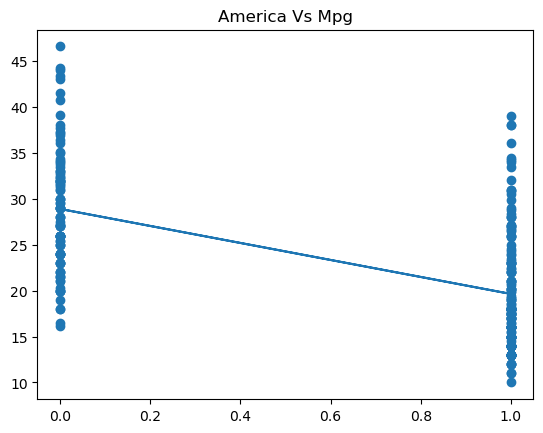

In [208]:
x= cars.America
y= cars.mpg
slope,intercept,r,p,std_err=sps.linregress(x,y)

def myfunc(x):
  return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.title('America Vs Mpg')
plt.show()

## 11.c)REGRESSION FIT Model (Stats Model)

### 11.c.1)REGRESSION MODEL 1 USING LINEAR

In [209]:
reg1 = smf.ols(formula='mpg ~ hp',data=cars).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     394.5
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.28e-53
Time:                        19:02:55   Log-Likelihood:                -770.93
No. Observations:                 256   AIC:                             1546.
Df Residuals:                     254   BIC:                             1553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.3008      0.868     45.280      0.000      37.592      41.010
hp            -0.1509      0.008    -19.862      0.000      -0.166      -0.136
==============================================================================
Omnibus:                       14.439   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.223
Skew:                           0.567   Prob(JB):                     0.000495
Kurtosis:                       3.374   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 11.c.2)REGRESSION MODEL 2 USING LINEAR

In [210]:
reg2 = smf.ols(formula='mpg ~ hp + weightlbs + cubicinches + America',data=cars).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.53e-65
Time:                        19:02:55   Log-Likelihood:                -734.62
No. Observations:                 256   AIC:                             1479.
Df Residuals:                     251   BIC:                             1497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.6374      1.523     29.318      0.000      41.639      47.636
hp             -0.0554      0.017     -3.307      0.001      -0.088      -0.022
weightlbs      -0.0050      0.001     -5.729      0.000      -0.007      -0.003
cubicinches     0.0022      0.009      0.245      0.806      -0.016       0.020
America        -1.7558      0.798     -2.200      0.029      -3.327      -0.184
==============================================================================
Omnibus:                       27.857   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.952
Skew:                           0.736   Prob(JB):                     9.46e-09
Kurtosis:                       4.138   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 11.c.3)REGRESSION MODEL 3 USING LINEAR

In [211]:
reg3 = smf.ols(formula = 'mpg ~ hp * C(cylinders)',data=cars).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     88.86
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           3.72e-72
Time:                        19:02:55   Log-Likelihood:                -705.68
No. Observations:                 256   AIC:                             1431.
Df Residuals:                     246   BIC:                             1467.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.2500     27.620      0.081      0.935     -52.151      56.651
C(cylinders)[T.4.0]       46.5486     27.679      1.682      0.094      -7.970     101.067
C(cylinders)[T.5.0]       57.7877     30.268      1.909      0.057      -1.829     117.405
C(cylinders)[T.6.0]       15.9970     27.851      0.574      0.566     -38.860      70.854
C(cylinders)[T.8.0]       20.4039     27.736      0.736      0.463     -34.226      75.034
hp                         0.1750      0.275      0.637      0.525      -0.366       0.716
hp:C(cylinders)[T.4.0]    -0.4270      0.276     -1.548      0.123      -0.970       0.116
hp:C(cylinders)[T.5.0]    -0.5718      0.312     -1.832      0.068      -1.187       0.043
hp:C(cylinders)[T.6.0]    -0.1554      0.277     -0.561      0.575      -0.701       0.390
hp:C(cylinders)[T.8.0]    -0.2221      0.275     -0.807      0.421      -0.764       0.320
==============================================================================
Omnibus:                       40.515   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.012
Skew:                           0.682   Prob(JB):                     1.75e-25
Kurtosis:                       5.972   Cond. No.                     3.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 11.c.4)REGRESSION MODEL 4 USING LINEAR

In [212]:
reg4 = smf.ols(formula = 'mpg ~ cubicinches * C(America) + C(Europe)+ C(Japan)',data=cars).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     133.5
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           6.35e-61
Time:                        19:02:55   Log-Likelihood:                -744.99
No. Observations:                 256   AIC:                             1500.
Df Residuals:                     251   BIC:                             1518.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      30.1166      1.098     27.429      0.000      27.954      32.279
C(America)[T.1]                 3.1762      1.303      2.437      0.015       0.610       5.743
C(Europe)[T.1]                 12.4605      1.237     10.076      0.000      10.025      14.896
C(Japan)[T.1]                  14.4798      1.140     12.707      0.000      12.236      16.724
cubicinches                    -0.1380      0.020     -7.051      0.000      -0.177      -0.099
cubicinches:C(America)[T.1]     0.0855      0.020      4.297      0.000       0.046       0.125
==============================================================================
Omnibus:                       44.280   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.638
Skew:                           0.816   Prob(JB):                     3.13e-23
Kurtosis:                       5.656   Cond. No.                     2.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.71e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [213]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand,America,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s
0,14.0,8.0,350,165.0,4209,12.0,1972,US.,1,0,0,1,0,0,0
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.,0,1,0,1,0,0,0
2,17.0,8.0,302,140.0,3449,11.0,1971,US.,1,0,0,1,0,0,0
3,15.0,8.0,400,150.0,3761,10.0,1971,US.,1,0,0,0,0,0,0
4,30.5,4.0,98,63.0,2051,17.0,1978,US.,1,0,0,1,0,0,0


### 11.d)LOGIT FUNCTION USING LINEAR

In [214]:
logreg = smf.logit("America ~ hp   + C(YearAbove_80s)+C(Japan) ",data=cars).fit(maxiter=100)
logreg.summary()

         Current function value: 0.306385
         Iterations: 100


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                America   No. Observations:                  256
Model:                          Logit   Df Residuals:                      252
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.5396
Time:                        19:02:55   Log-Likelihood:                -78.434
converged:                      False   LL-Null:                       -170.35
Covariance Type:            nonrobust   LLR p-value:                 1.314e-39
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.4574      0.936     -4.763      0.000      -6.292      -2.623
C(YearAbove_80s)[T.1]     1.5878      0.556      2.855      0.004       0.498       2.678
C(Japan)[T.1]           -28.7153   1.07e+05     -0.000      1.000    -2.1e+05     2.1e+05
hp                        0.0560      0.010      5.517      0.000       0.036       0.076
=========================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [215]:
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time_to_60',
       'year', 'brand', 'America', 'Europe', 'Japan', 'TimeAbove_10',
       'YearAbove_80s', 'CubicinchesAbove150s', 'WgtAbov2500s'],
      dtype='object')

In [216]:
prob = logreg.predict(cars[['mpg','America','Japan','hp','YearAbove_80s']])

In [217]:
pred=[]

In [218]:
#pred[prob<.5]=0
#pred[prob>=.5]=1

In [219]:
cars['Prob'] = prob

In [220]:
mtcar = cars.sort_values(by='Prob', ascending=False)

In [221]:
data = cars.copy()
train_dataset_l = data.sample(frac=0.8, random_state=0)
test_dataset_l = data.drop(train_dataset_l.index)


In [222]:
train_x = train_dataset_l.copy()
test_y = test_dataset_l.copy()

train_labels_x = train_x.pop('mpg')
test_labels_y = test_y.pop('mpg')

test_predictions_Linear_1 = reg1.predict(test_y)
test_predictions_Linear_2 = reg2.predict(test_y)
test_predictions_Linear_3 = reg3.predict(test_y)
test_predictions_Linear_4 = reg4.predict(test_y)

### 11.e)TRUE VALUE VS PREDICTED VALUE

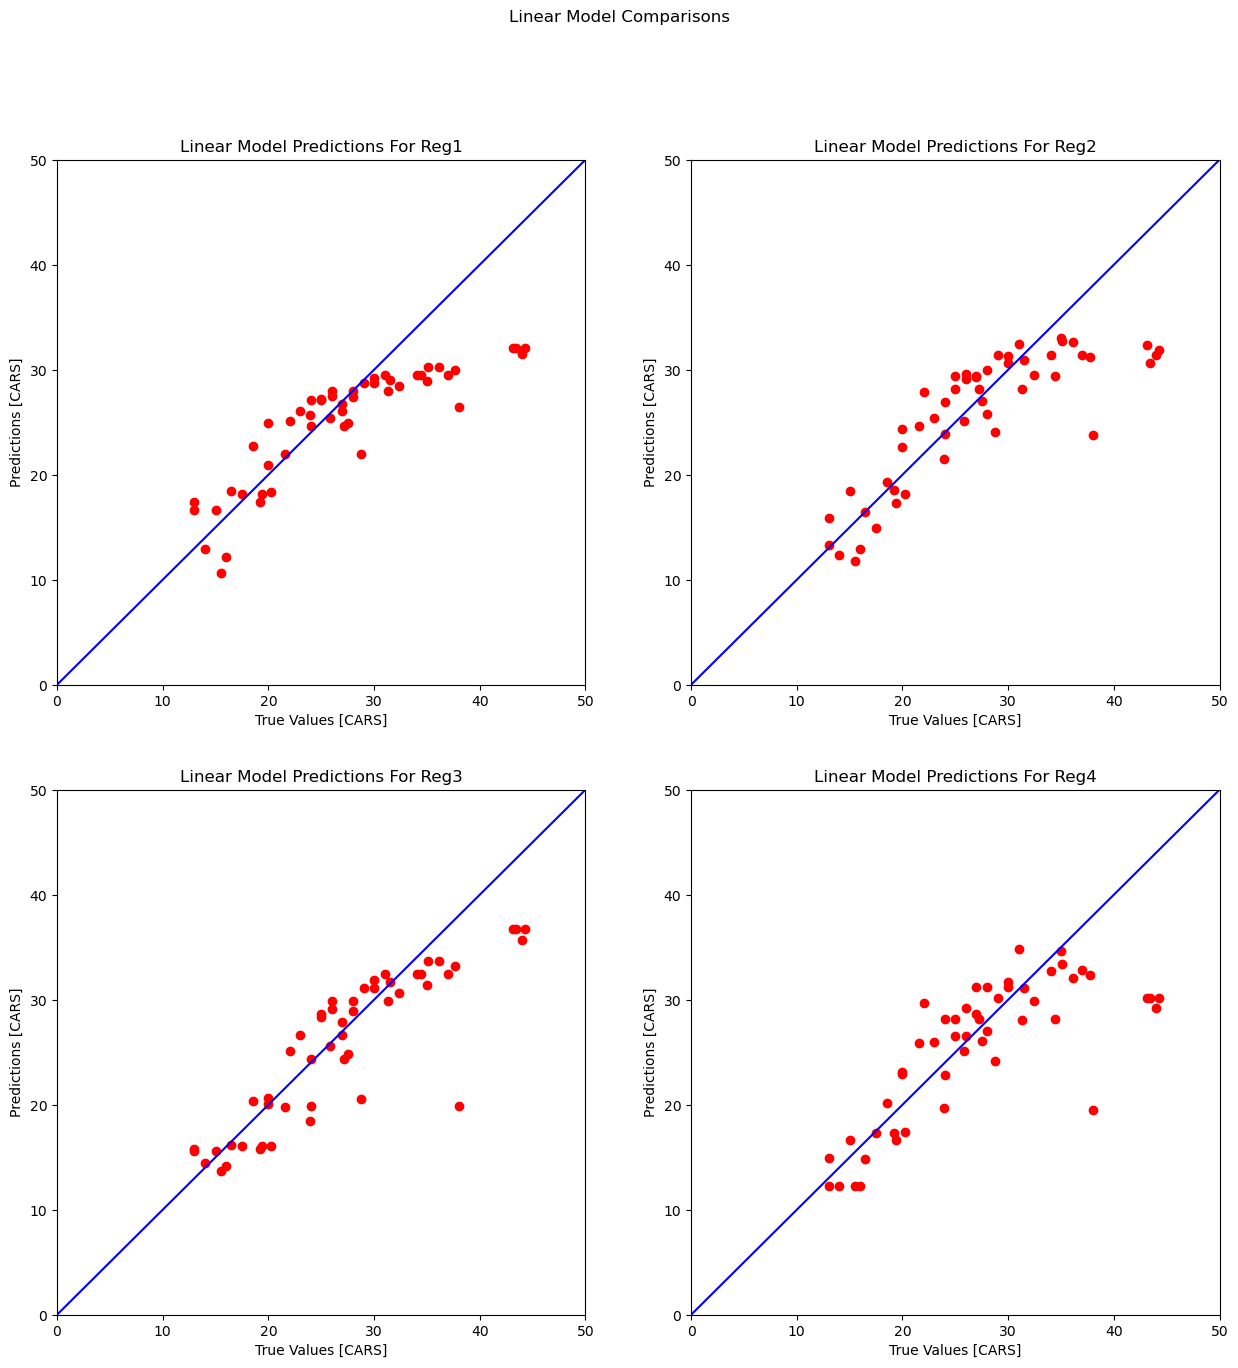

In [223]:
lims = [0, 50]
fig, axs = plt.subplots(2,2,figsize=(15,15))

fig.suptitle('Linear Model Comparisons')

axs[0,0].scatter(test_labels_y,test_predictions_Linear_1,color='r')
axs[0,0].set_xlabel('True Values [CARS]')
axs[0,0].set_ylabel('Predictions [CARS]')
axs[0,0].set_xlim(lims)
axs[0,0].set_ylim(lims)
axs[0,0].plot(lims,lims,color='b')
axs[0,0].set_title('Linear Model Predictions For Reg1')

axs[0,1].scatter(test_labels_y,test_predictions_Linear_2,color='r')
axs[0,1].set_xlabel('True Values [CARS]')
axs[0,1].set_ylabel('Predictions [CARS]')
axs[0,1].set_xlim(lims)
axs[0,1].set_ylim(lims)
axs[0,1].plot(lims,lims,color='b')
axs[0,1].set_title('Linear Model Predictions For Reg2')

axs[1,0].scatter(test_labels_y,test_predictions_Linear_3,color='r')
axs[1,0].set_xlabel('True Values [CARS]')
axs[1,0].set_ylabel('Predictions [CARS]')
axs[1,0].set_xlim(lims)
axs[1,0].set_ylim(lims)
axs[1,0].plot(lims,lims,color='b')
axs[1,0].set_title('Linear Model Predictions For Reg3')

axs[1,1].scatter(test_labels_y,test_predictions_Linear_4,color='r')
axs[1,1].set_xlabel('True Values [CARS]')
axs[1,1].set_ylabel('Predictions [CARS]')
axs[1,1].set_xlim(lims)
axs[1,1].set_ylim(lims)
axs[1,1].plot(lims,lims,color='b')
axs[1,1].set_title('Linear Model Predictions For Reg4')

plt.show()

## 12)Non - Linear Model Neural Network 

In [224]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [225]:
cars

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand,America,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s,Prob
0,14.0,8.0,350,165.0,4209,12.0,1972,US.,1,0,0,1,0,0,0,9.917424e-01
1,31.9,4.0,89,71.0,1925,14.0,1980,Europe.,0,1,0,1,0,0,0,3.824993e-01
2,17.0,8.0,302,140.0,3449,11.0,1971,US.,1,0,0,1,0,0,0,9.673101e-01
3,15.0,8.0,400,150.0,3761,10.0,1971,US.,1,0,0,0,0,0,0,9.810683e-01
4,30.5,4.0,98,63.0,2051,17.0,1978,US.,1,0,0,1,0,0,0,2.834866e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,17.0,8.0,305,130.0,3840,15.0,1980,US.,1,0,0,1,0,0,0,9.441231e-01
252,36.1,4.0,91,60.0,1800,16.0,1979,Japan.,0,0,1,1,0,0,0,1.130888e-13
253,22.0,6.0,232,112.0,2835,15.0,1983,US.,1,0,0,1,1,0,0,9.679003e-01
254,18.0,6.0,232,100.0,3288,16.0,1972,US.,1,0,0,1,0,0,0,7.587902e-01


In [226]:
cars.isna().sum()

mpg                     0
cylinders               0
cubicinches             0
hp                      0
weightlbs               0
time_to_60              0
year                    0
brand                   0
America                 0
Europe                  0
Japan                   0
TimeAbove_10            0
YearAbove_80s           0
CubicinchesAbove150s    0
WgtAbov2500s            0
Prob                    0
dtype: int64

In [227]:
dataset = cars.copy()

In [228]:
dataset = dataset.drop(columns='brand')

In [229]:
dataset

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,America,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s,Prob
0,14.0,8.0,350,165.0,4209,12.0,1972,1,0,0,1,0,0,0,9.917424e-01
1,31.9,4.0,89,71.0,1925,14.0,1980,0,1,0,1,0,0,0,3.824993e-01
2,17.0,8.0,302,140.0,3449,11.0,1971,1,0,0,1,0,0,0,9.673101e-01
3,15.0,8.0,400,150.0,3761,10.0,1971,1,0,0,0,0,0,0,9.810683e-01
4,30.5,4.0,98,63.0,2051,17.0,1978,1,0,0,1,0,0,0,2.834866e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,17.0,8.0,305,130.0,3840,15.0,1980,1,0,0,1,0,0,0,9.441231e-01
252,36.1,4.0,91,60.0,1800,16.0,1979,0,0,1,1,0,0,0,1.130888e-13
253,22.0,6.0,232,112.0,2835,15.0,1983,1,0,0,1,1,0,0,9.679003e-01
254,18.0,6.0,232,100.0,3288,16.0,1972,1,0,0,1,0,0,0,7.587902e-01


In [230]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### 12.a.1)HIST PLOT

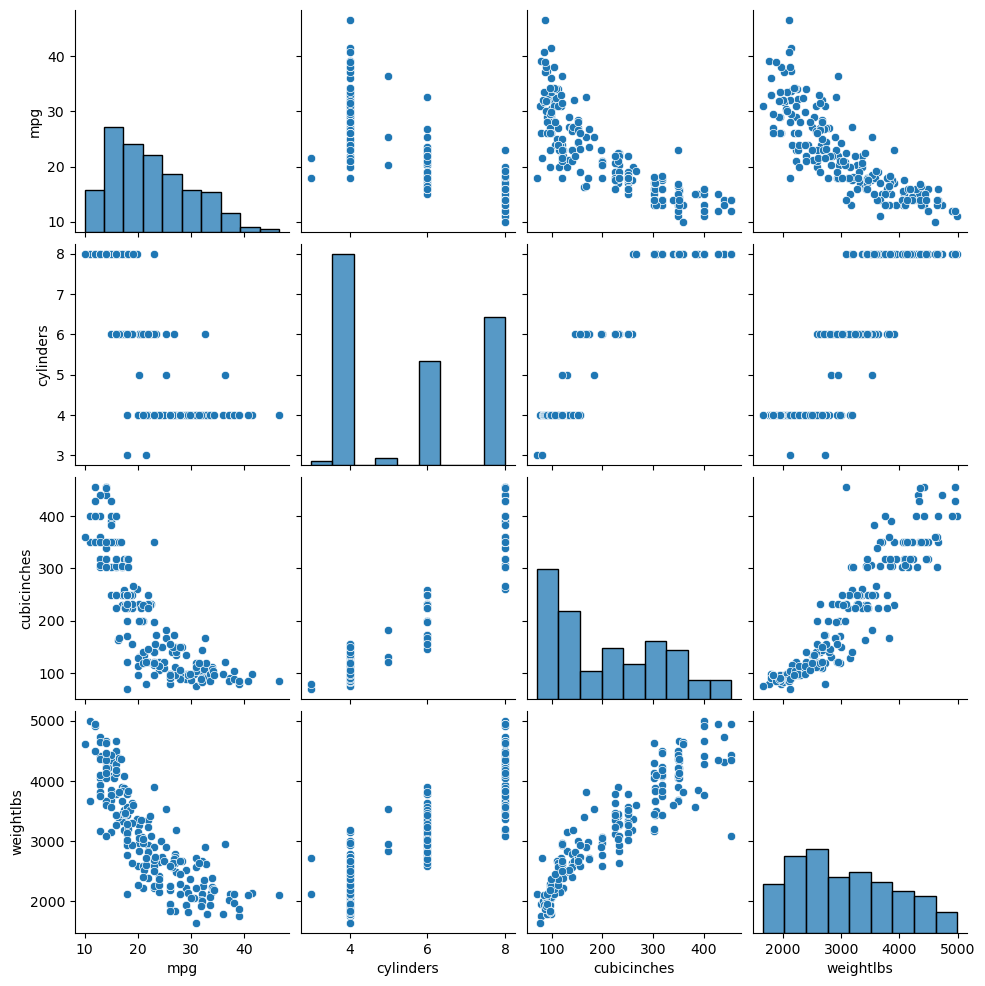

In [231]:
sb.pairplot(train_dataset[['mpg', 'cylinders', 'cubicinches', 'weightlbs']], diag_kind='hist')
plt.show()

### 12.a.2)KDE PLOT

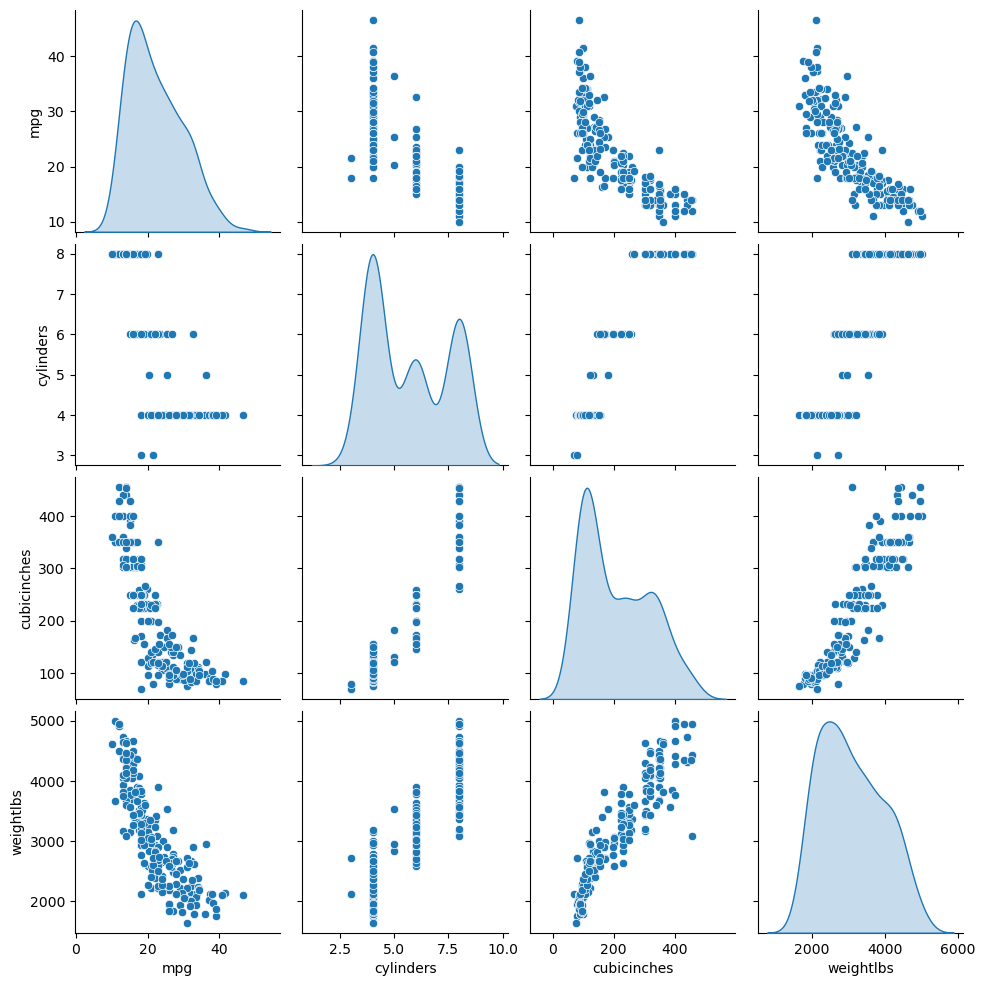

In [232]:
sb.pairplot(train_dataset[['mpg', 'cylinders', 'cubicinches', 'weightlbs']], diag_kind='kde')
plt.show()

In [233]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [CARS]')
  plt.legend()
  plt.grid(True)

In [234]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [235]:
train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

In [236]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
mpg,22.248293,7.477191
cylinders,5.692683,1.745637
cubicinches,209.014634,109.283517
hp,109.780488,41.265349
weightlbs,3082.019512,853.012671
time_to_60,15.341463,2.800646
year,1976.600000,3.687020
America,0.668293,0.471979
Europe,0.170732,0.377195
Japan,0.160976,0.368408


In [237]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [238]:
normalizer = preprocessing.Normalization()

In [239]:
train_features = np.asarray(train_features).astype(np.float32)

In [240]:
normalizer.adapt(np.array(train_features))

## 12.b)Linear MODEL PREDICTION USING NEURAL NETWORK

In [241]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_1 = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=2,
    validation_split = 0.2)


Epoch 1/100
6/6 - 0s - loss: 21.8674 - val_loss: 22.7240 - 281ms/epoch - 47ms/step
Epoch 2/100
6/6 - 0s - loss: 21.1951 - val_loss: 22.3964 - 20ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 20.4969 - val_loss: 21.8567 - 21ms/epoch - 3ms/step
Epoch 4/100
6/6 - 0s - loss: 19.8422 - val_loss: 21.5321 - 23ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 19.1889 - val_loss: 21.2486 - 24ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 18.5640 - val_loss: 21.1537 - 18ms/epoch - 3ms/step
Epoch 7/100
6/6 - 0s - loss: 18.1112 - val_loss: 20.6636 - 23ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 17.4637 - val_loss: 19.9853 - 22ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 16.8002 - val_loss: 19.3147 - 21ms/epoch - 4ms/step
Epoch 10/100
6/6 - 0s - loss: 16.2277 - val_loss: 18.7134 - 23ms/epoch - 4ms/step
Epoch 11/100
6/6 - 0s - loss: 15.6270 - val_loss: 18.0961 - 21ms/epoch - 4ms/step
Epoch 12/100
6/6 - 0s - loss: 15.0635 - val_loss: 17.2633 - 21ms/epoch - 3ms/step
Epoch 13/100
6/6 - 0s -

### 12.b.1)EPOCH VS ERROR FOR LINEAR REGRESSION

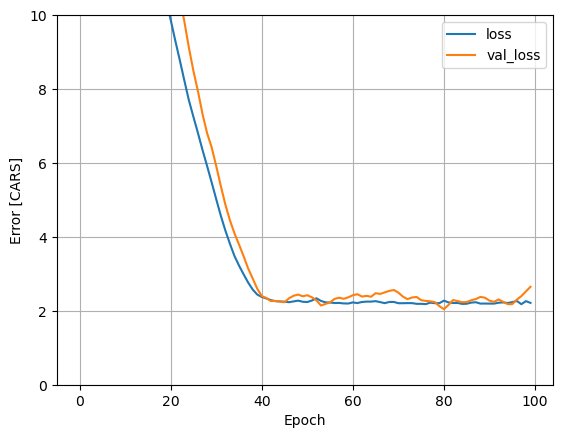

In [242]:
plot_loss(history_1)
plt.show()

In [243]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## 12.c)NON - Linear MODEL PREDICTION USING NEURAL NETWORK

In [244]:
NNR_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

NNR_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

history_2 = NNR_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=2, epochs=100)


Epoch 1/100
6/6 - 0s - loss: 21.9304 - val_loss: 22.7787 - 251ms/epoch - 42ms/step
Epoch 2/100
6/6 - 0s - loss: 21.4286 - val_loss: 22.2853 - 21ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 20.9181 - val_loss: 21.7534 - 23ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 20.3480 - val_loss: 21.1315 - 20ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 19.6861 - val_loss: 20.3931 - 19ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 18.8945 - val_loss: 19.5038 - 23ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 17.9169 - val_loss: 18.4142 - 20ms/epoch - 3ms/step
Epoch 8/100
6/6 - 0s - loss: 16.6954 - val_loss: 17.0732 - 19ms/epoch - 3ms/step
Epoch 9/100
6/6 - 0s - loss: 15.1971 - val_loss: 15.6233 - 22ms/epoch - 4ms/step
Epoch 10/100
6/6 - 0s - loss: 13.6413 - val_loss: 14.0166 - 20ms/epoch - 3ms/step
Epoch 11/100
6/6 - 0s - loss: 12.1287 - val_loss: 12.0942 - 20ms/epoch - 3ms/step
Epoch 12/100
6/6 - 0s - loss: 10.4102 - val_loss: 9.9291 - 22ms/epoch - 4ms/step
Epoch 13/100
6/6 - 0s - 

### 12.c.1)EPOCH VS ERROR IN NON LINEAR

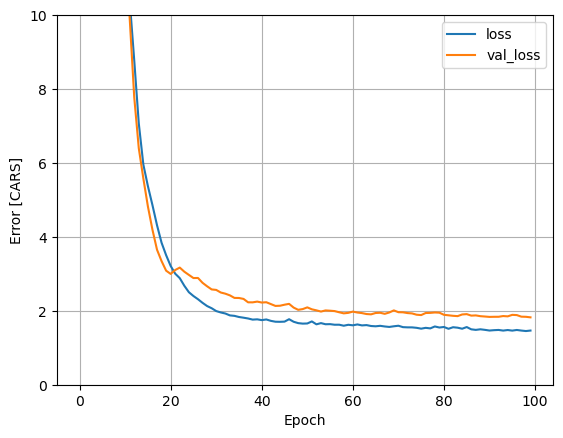

In [245]:
plot_loss(history_2)
plt.show()

In [246]:
test_results['NNR_model'] = NNR_model.evaluate(test_features, test_labels, verbose=0)


In [247]:
print(pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T)

              Mean absolute error [MPG]
linear_model                   3.344518
NNR_model                      2.474640


### 12.d)PREDICTING LINEAR AND NON LINEAR MODEL

In [248]:
test_predictions_L = linear_model.predict(test_features).flatten()
test_predictions_NL = NNR_model.predict(test_features).flatten()


2/2 [==============================] - 0s 1ms/step


In [249]:
test_features

,cylinders,cubicinches,hp,weightlbs,time_to_60,year,America,Europe,Japan,TimeAbove_10,YearAbove_80s,CubicinchesAbove150s,WgtAbov2500s,Prob
9,4.0,89,62.0,2050,17.0,1982,0,0,1,1,1,0,0,6.189651e-13
21,6.0,200,81.0,3012,18.0,1977,1,0,0,1,0,0,0,5.203377e-01
25,4.0,71,65.0,1773,19.0,1972,0,0,1,1,0,0,0,1.496573e-13
29,4.0,97,88.0,2130,15.0,1971,0,0,1,1,0,0,0,5.430222e-13
32,4.0,97,67.0,1985,16.0,1978,0,0,1,1,0,0,0,1.674053e-13
36,8.0,351,138.0,3955,13.0,1980,1,0,0,1,0,0,0,9.635746e-01
39,6.0,250,110.0,3645,16.0,1977,1,0,0,1,0,0,0,8.463697e-01
47,8.0,400,150.0,4464,12.0,1974,1,0,0,1,0,0,0,9.810683e-01
58,4.0,108,94.0,2379,17.0,1974,0,0,1,1,0,0,0,7.600312e-13
67,6.0,198,95.0,3102,17.0,1975,1,0,0,1,0,0,0,7.038885e-01


In [250]:
test_features.shape

(51, 14)

In [251]:
test_labels

9      37.7
21     24.0
25     31.0
29     27.0
32     30.0
36     16.5
39     18.5
47     13.0
58     22.0
67     20.0
70     24.0
72     38.0
77     15.5
79     19.2
81     25.0
82     35.0
87     34.1
88     27.2
99     25.0
103    43.4
115    34.4
117    27.0
127    26.0
140    35.1
142    23.0
147    31.3
148    27.5
165    20.0
167    32.4
172    14.0
174    20.2
175    31.5
177    17.5
185    25.8
192    43.1
193    29.0
195    26.0
197    23.9
208    30.0
211    37.0
213    28.8
216    21.6
226    28.0
230    44.0
237    16.0
240    15.0
241    19.4
242    44.3
243    28.0
248    13.0
252    36.1
Name: mpg, dtype: float64

In [252]:
test_labels.shape

(51,)

In [253]:
test_results

{'linear_model': 3.344517707824707, 'NNR_model': 2.474639892578125}

## 12.d.1)MODEL COMAPARISIONS FOR LINEAR AND NON-LINEAR MODEL

#### PREDICTED VALUE VS TRUE VALUE

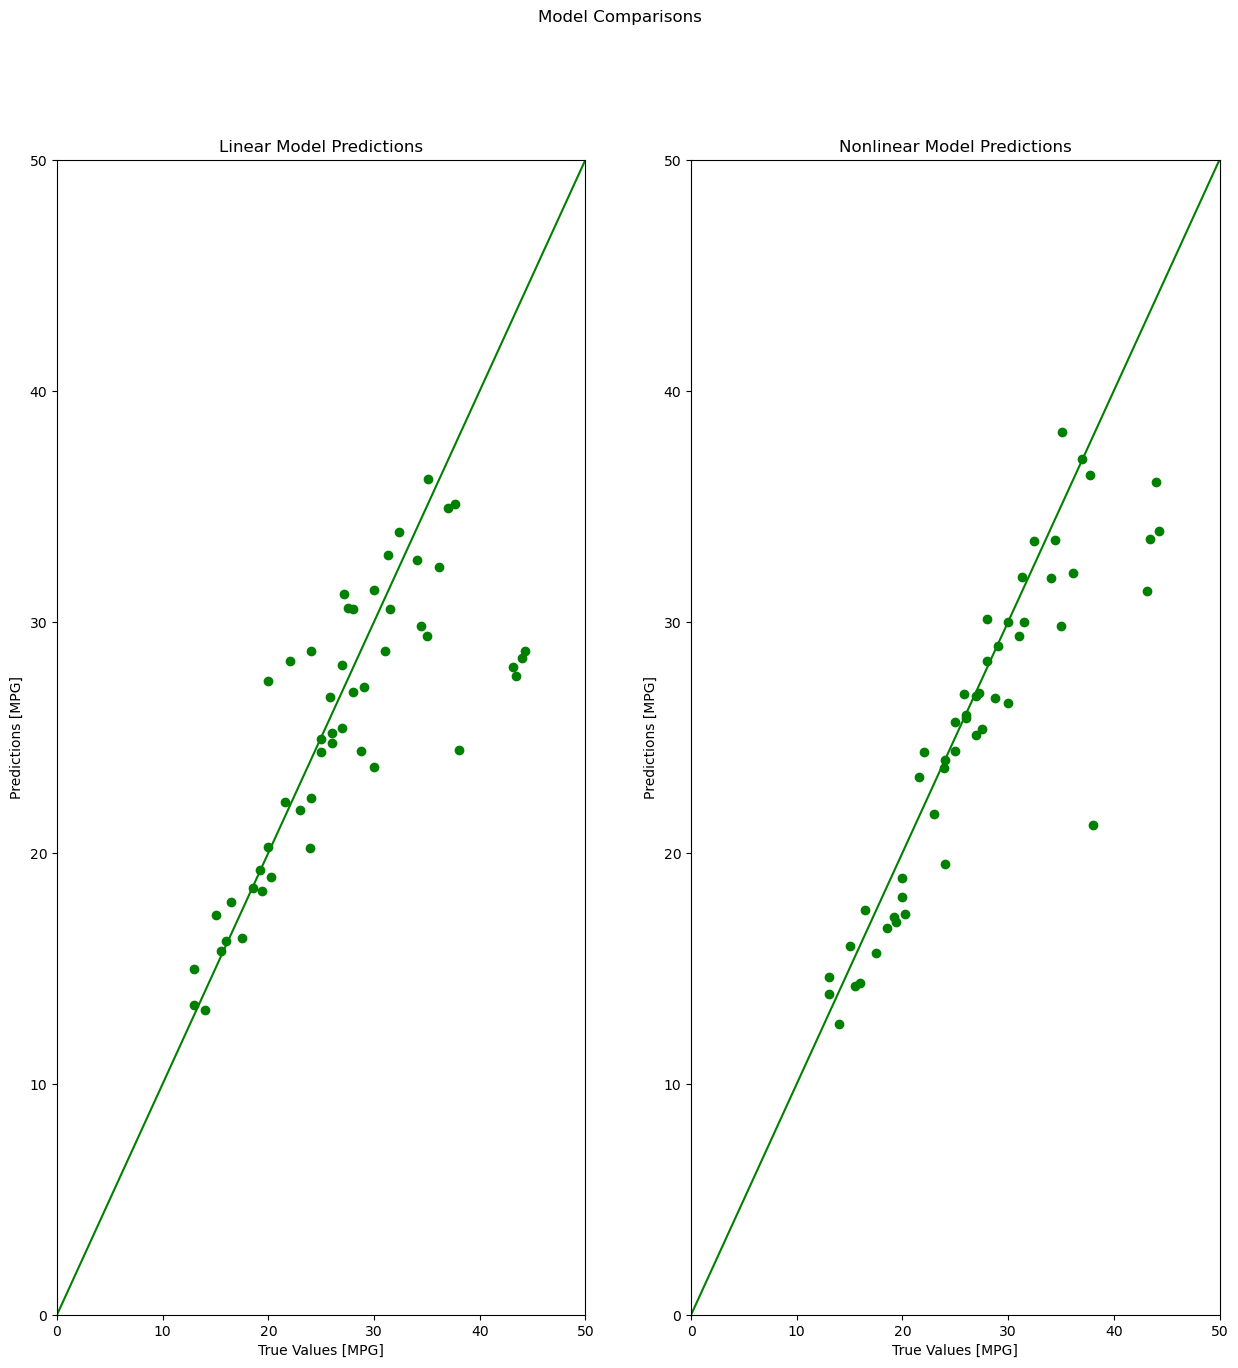

In [254]:
lims = [0, 50]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))

fig.suptitle('Model Comparisons')

axs[0].scatter(test_labels,test_predictions_L,color='g')
axs[0].set_xlabel('True Values [MPG]')
axs[0].set_ylabel('Predictions [MPG]')
axs[0].set_xlim(lims)
axs[0].set_ylim(lims)
axs[0].plot(lims,lims,color='g')
axs[0].set_title('Linear Model Predictions')


axs[1].scatter(test_labels,test_predictions_NL,color='g')
axs[1].set_xlabel('True Values [MPG]')
axs[1].set_ylabel('Predictions [MPG]')
axs[1].set_xlim(lims)
axs[1].set_ylim(lims)
axs[1].plot(lims,lims,color='g')
axs[1].set_title('Nonlinear Model Predictions')

plt.show()


## 13)DEEP NEURAL NETWORK

In [255]:
T = np.linspace(0,5,500)

##  13.a)LINEAR MODEL  FOR DEEP NEURAL NETWORK

In [256]:
linear_model = keras.Sequential([
    layers.Dense(units=1) 
])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')
history = linear_model.fit(
    train_features, train_labels,
    epochs=100,
    verbose=2,
    validation_split = 0.2)

Epoch 1/100
6/6 - 0s - loss: 327.6602 - val_loss: 307.9698 - 202ms/epoch - 34ms/step
Epoch 2/100
6/6 - 0s - loss: 277.8028 - val_loss: 326.3817 - 21ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 270.9904 - val_loss: 294.4174 - 17ms/epoch - 3ms/step
Epoch 4/100
6/6 - 0s - loss: 256.6758 - val_loss: 265.1855 - 21ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 245.9973 - val_loss: 256.3421 - 20ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 232.1739 - val_loss: 250.3520 - 18ms/epoch - 3ms/step
Epoch 7/100
6/6 - 0s - loss: 220.9889 - val_loss: 248.0019 - 21ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 209.1327 - val_loss: 227.7231 - 18ms/epoch - 3ms/step
Epoch 9/100
6/6 - 0s - loss: 194.4010 - val_loss: 200.6737 - 21ms/epoch - 4ms/step
Epoch 10/100
6/6 - 0s - loss: 183.4171 - val_loss: 184.4309 - 20ms/epoch - 3ms/step
Epoch 11/100
6/6 - 0s - loss: 167.3275 - val_loss: 182.7691 - 21ms/epoch - 4ms/step
Epoch 12/100
6/6 - 0s - loss: 155.4469 - val_loss: 164.4313 - 18ms/epoch - 3ms/step

## 13.a.1)Graph For Loss and Epoch In Model 1

In [257]:
# Predictions_Linear = linear_model.predict(T)

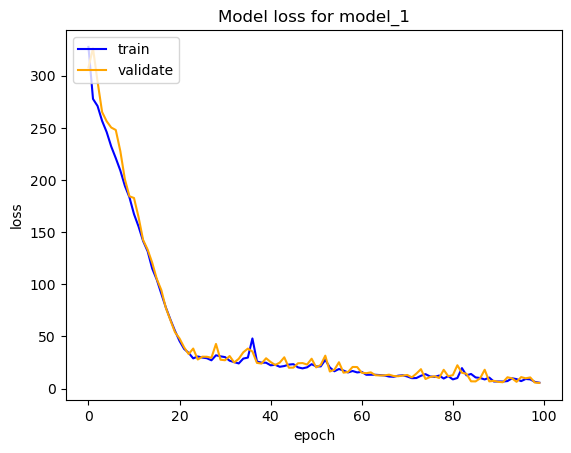

In [258]:
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'orange')
plt.title('Model loss for model_1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 13.b.1)MODEL 1 FOR DEEP NEURAL NETWORK

In [259]:
NL_model1 = keras.Sequential([
      layers.Dense(1, activation='relu'),
      layers.Dense(1, activation='relu'),
      layers.Dense(1, activation='relu'),
      layers.Dense(1)
  ])

NL_model1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

history1 = NL_model1.fit(
    train_features, train_labels,
    epochs=100,
    verbose=2,
    validation_split = 0.2)

Epoch 1/100
6/6 - 0s - loss: 21.9878 - val_loss: 23.1473 - 266ms/epoch - 44ms/step
Epoch 2/100
6/6 - 0s - loss: 21.9278 - val_loss: 23.0873 - 20ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 21.8678 - val_loss: 23.0273 - 20ms/epoch - 3ms/step
Epoch 4/100
6/6 - 0s - loss: 21.8078 - val_loss: 22.9673 - 22ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 21.7478 - val_loss: 22.9073 - 21ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 21.6878 - val_loss: 22.8473 - 21ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 21.6278 - val_loss: 22.7873 - 22ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 21.5678 - val_loss: 22.7273 - 20ms/epoch - 3ms/step
Epoch 9/100
6/6 - 0s - loss: 21.5078 - val_loss: 22.6673 - 19ms/epoch - 3ms/step
Epoch 10/100
6/6 - 0s - loss: 21.4478 - val_loss: 22.6073 - 23ms/epoch - 4ms/step
Epoch 11/100
6/6 - 0s - loss: 21.3878 - val_loss: 22.5473 - 20ms/epoch - 3ms/step
Epoch 12/100
6/6 - 0s - loss: 21.3278 - val_loss: 22.4873 - 20ms/epoch - 3ms/step
Epoch 13/100
6/6 - 0s -

## 13.b.2)Graph For Loss and Epoch In Model 1

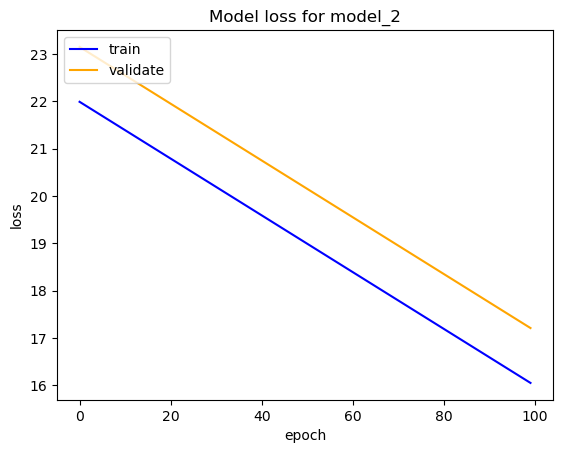

In [260]:
plt.plot(history1.history['loss'], 'blue')
plt.plot(history1.history['val_loss'], 'orange')
plt.title('Model loss for model_2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

##  13.c)MODEL 2 FOR DEEP NEURAL NETWORK

In [261]:
NL_model2 = keras.Sequential([
      layers.Dense(10, activation='selu'),
      layers.Dense(10, activation='selu'),
      layers.Dense(10, activation='selu'),
      
      layers.Dense(1)
  ])

NL_model2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

history2 = NL_model2.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=2,
    validation_split = 0.2)

Epoch 1/100
6/6 - 0s - loss: 118.2531 - val_loss: 5.4786 - 268ms/epoch - 45ms/step
Epoch 2/100
6/6 - 0s - loss: 22.5842 - val_loss: 19.5501 - 19ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 12.2974 - val_loss: 10.0703 - 23ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 8.1423 - val_loss: 6.6228 - 20ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 6.4980 - val_loss: 6.2197 - 19ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 6.3505 - val_loss: 8.0691 - 22ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 6.1449 - val_loss: 5.6806 - 19ms/epoch - 3ms/step
Epoch 8/100
6/6 - 0s - loss: 5.0335 - val_loss: 4.5059 - 21ms/epoch - 3ms/step
Epoch 9/100
6/6 - 0s - loss: 4.0257 - val_loss: 7.1217 - 22ms/epoch - 4ms/step
Epoch 10/100
6/6 - 0s - loss: 5.5272 - val_loss: 3.8561 - 18ms/epoch - 3ms/step
Epoch 11/100
6/6 - 0s - loss: 5.8008 - val_loss: 9.4679 - 22ms/epoch - 4ms/step
Epoch 12/100
6/6 - 0s - loss: 9.7562 - val_loss: 5.9836 - 21ms/epoch - 3ms/step
Epoch 13/100
6/6 - 0s - loss: 6.0220 - va

## 13.c.1)Graph For Loss and Epoch In Model 2

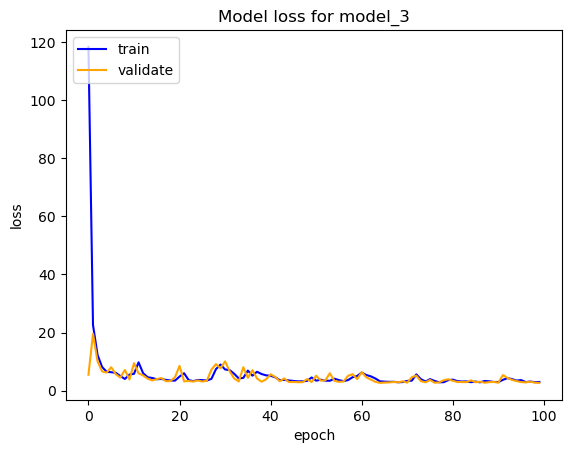

In [262]:
plt.plot(history2.history['loss'], 'blue')
plt.plot(history2.history['val_loss'], 'orange')
plt.title('Model loss for model_3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 13.d)MODEL 3 FOR DEEP NEURAL NETWORK

In [263]:
NL_model3 = keras.Sequential([
      layers.Dense(50, activation='sigmoid'),
      layers.Dense(50, activation='sigmoid'),
      layers.Dense(50, activation='gelu'),
      
      layers.Dense(1)
  ])

NL_model3.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

history3 = NL_model3.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=2,
    validation_split = 0.2)


Epoch 1/100
6/6 - 0s - loss: 19.1300 - val_loss: 13.9839 - 313ms/epoch - 52ms/step
Epoch 2/100
6/6 - 0s - loss: 8.3982 - val_loss: 6.0861 - 23ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 8.7772 - val_loss: 6.7178 - 25ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 6.9740 - val_loss: 7.2151 - 23ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 6.5823 - val_loss: 6.8136 - 21ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 5.8305 - val_loss: 5.8153 - 20ms/epoch - 3ms/step
Epoch 7/100
6/6 - 0s - loss: 5.9135 - val_loss: 6.1824 - 24ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 5.8960 - val_loss: 6.4202 - 22ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 5.5930 - val_loss: 5.2489 - 20ms/epoch - 3ms/step
Epoch 10/100
6/6 - 0s - loss: 5.2805 - val_loss: 5.4647 - 24ms/epoch - 4ms/step
Epoch 11/100
6/6 - 0s - loss: 5.0536 - val_loss: 4.9187 - 21ms/epoch - 3ms/step
Epoch 12/100
6/6 - 0s - loss: 4.3926 - val_loss: 3.6531 - 20ms/epoch - 3ms/step
Epoch 13/100
6/6 - 0s - loss: 3.8085 - val_lo

## 13.d.1)Graph For Loss and Epoch In Model 3

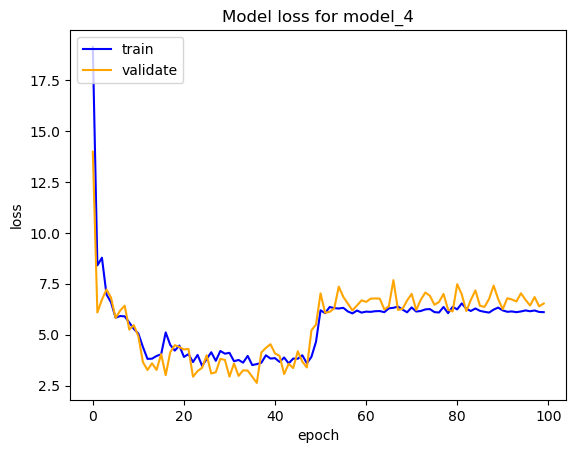

In [264]:
plt.plot(history3.history['loss'], 'blue')
plt.plot(history3.history['val_loss'], 'orange')
plt.title('Model loss for model_4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

##  13.e)MODEL 4 FOR DEEP NEURAL NETWORK

In [265]:
NL_model4 = keras.Sequential([
      layers.Dense(250, activation='softmax'),
      layers.Dense(250, activation='softmax'),
      layers.Dense(250, activation='sigmoid'),
      
      layers.Dense(1)
  ])

NL_model4.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

history4 = NL_model4.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=2,
    validation_split = 0.2)

Epoch 1/100
6/6 - 0s - loss: 19.5163 - val_loss: 15.3634 - 316ms/epoch - 53ms/step
Epoch 2/100
6/6 - 0s - loss: 11.3430 - val_loss: 8.0434 - 30ms/epoch - 5ms/step
Epoch 3/100
6/6 - 0s - loss: 6.5279 - val_loss: 6.0755 - 26ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 6.5346 - val_loss: 5.9976 - 25ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 6.5736 - val_loss: 6.1184 - 25ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 6.2442 - val_loss: 6.4038 - 31ms/epoch - 5ms/step
Epoch 7/100
6/6 - 0s - loss: 6.0920 - val_loss: 6.4366 - 28ms/epoch - 5ms/step
Epoch 8/100
6/6 - 0s - loss: 6.1035 - val_loss: 6.5218 - 28ms/epoch - 5ms/step
Epoch 9/100
6/6 - 0s - loss: 6.0874 - val_loss: 6.3540 - 27ms/epoch - 4ms/step
Epoch 10/100
6/6 - 0s - loss: 6.0945 - val_loss: 6.4297 - 25ms/epoch - 4ms/step
Epoch 11/100
6/6 - 0s - loss: 6.0774 - val_loss: 6.5711 - 25ms/epoch - 4ms/step
Epoch 12/100
6/6 - 0s - loss: 6.0971 - val_loss: 6.7700 - 25ms/epoch - 4ms/step
Epoch 13/100
6/6 - 0s - loss: 6.1523 - val_l

## 13.e.1)Graph For Loss and Epoch In Model 4

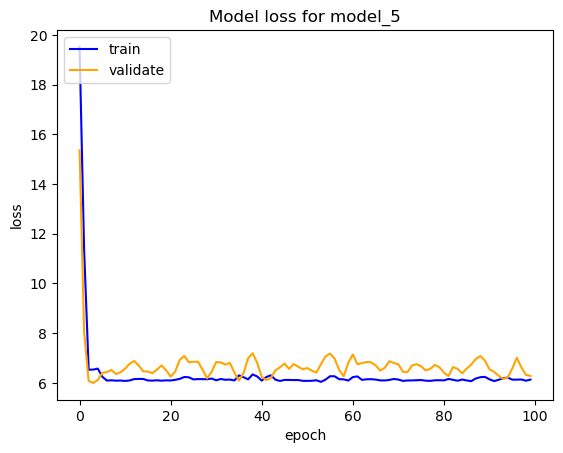

In [266]:
plt.plot(history4.history['loss'], 'blue')
plt.plot(history4.history['val_loss'], 'orange')
plt.title('Model loss for model_5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 13.f)MODEL 5 FOR DEEP NEURAL NETWORK

In [267]:
NL_model5 = keras.Sequential([
      layers.Dense(250, activation='gelu'),
      layers.Dense(250, activation='gelu'),
      layers.Dense(250, activation='gelu'),
      
      layers.Dense(1)
  ])

NL_model5.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

history5 = NL_model5.fit(
    train_features, train_labels,  
    epochs=100,
    verbose=2,
    validation_split = 0.2)

Epoch 1/100
6/6 - 0s - loss: 1026.1443 - val_loss: 76.3098 - 376ms/epoch - 63ms/step
Epoch 2/100
6/6 - 0s - loss: 95.8330 - val_loss: 28.6562 - 28ms/epoch - 5ms/step
Epoch 3/100
6/6 - 0s - loss: 16.1486 - val_loss: 8.2825 - 26ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 7.8811 - val_loss: 3.3183 - 25ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 3.7041 - val_loss: 5.0887 - 25ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 4.5300 - val_loss: 3.4406 - 26ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 3.2771 - val_loss: 4.4502 - 28ms/epoch - 5ms/step
Epoch 8/100
6/6 - 0s - loss: 3.5098 - val_loss: 3.4866 - 27ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 3.6194 - val_loss: 3.3846 - 25ms/epoch - 4ms/step
Epoch 10/100
6/6 - 0s - loss: 3.0823 - val_loss: 2.7040 - 25ms/epoch - 4ms/step
Epoch 11/100
6/6 - 0s - loss: 3.0949 - val_loss: 3.2141 - 26ms/epoch - 4ms/step
Epoch 12/100
6/6 - 0s - loss: 3.3346 - val_loss: 3.5305 - 27ms/epoch - 5ms/step
Epoch 13/100
6/6 - 0s - loss: 2.7562 - v

## 13.f.1)Graph For Loss and Epoch In Model 5

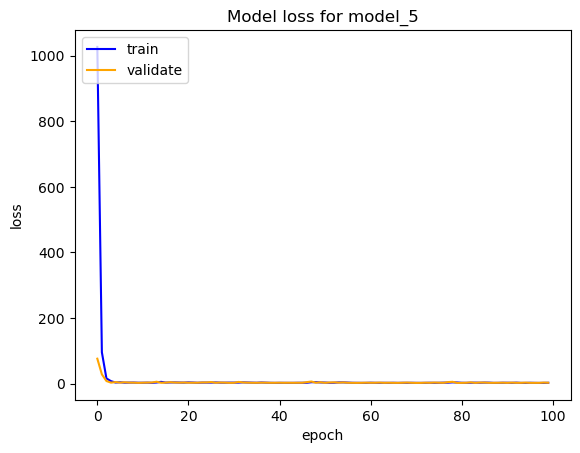

In [268]:
plt.plot(history5.history['loss'], 'blue')
plt.plot(history5.history['val_loss'], 'orange')
plt.title('Model loss for model_5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [269]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


## 14)LOSS(EPOCH) VS VALUE-LOSS(ERROR) FOR NON_LINEAR MODEL

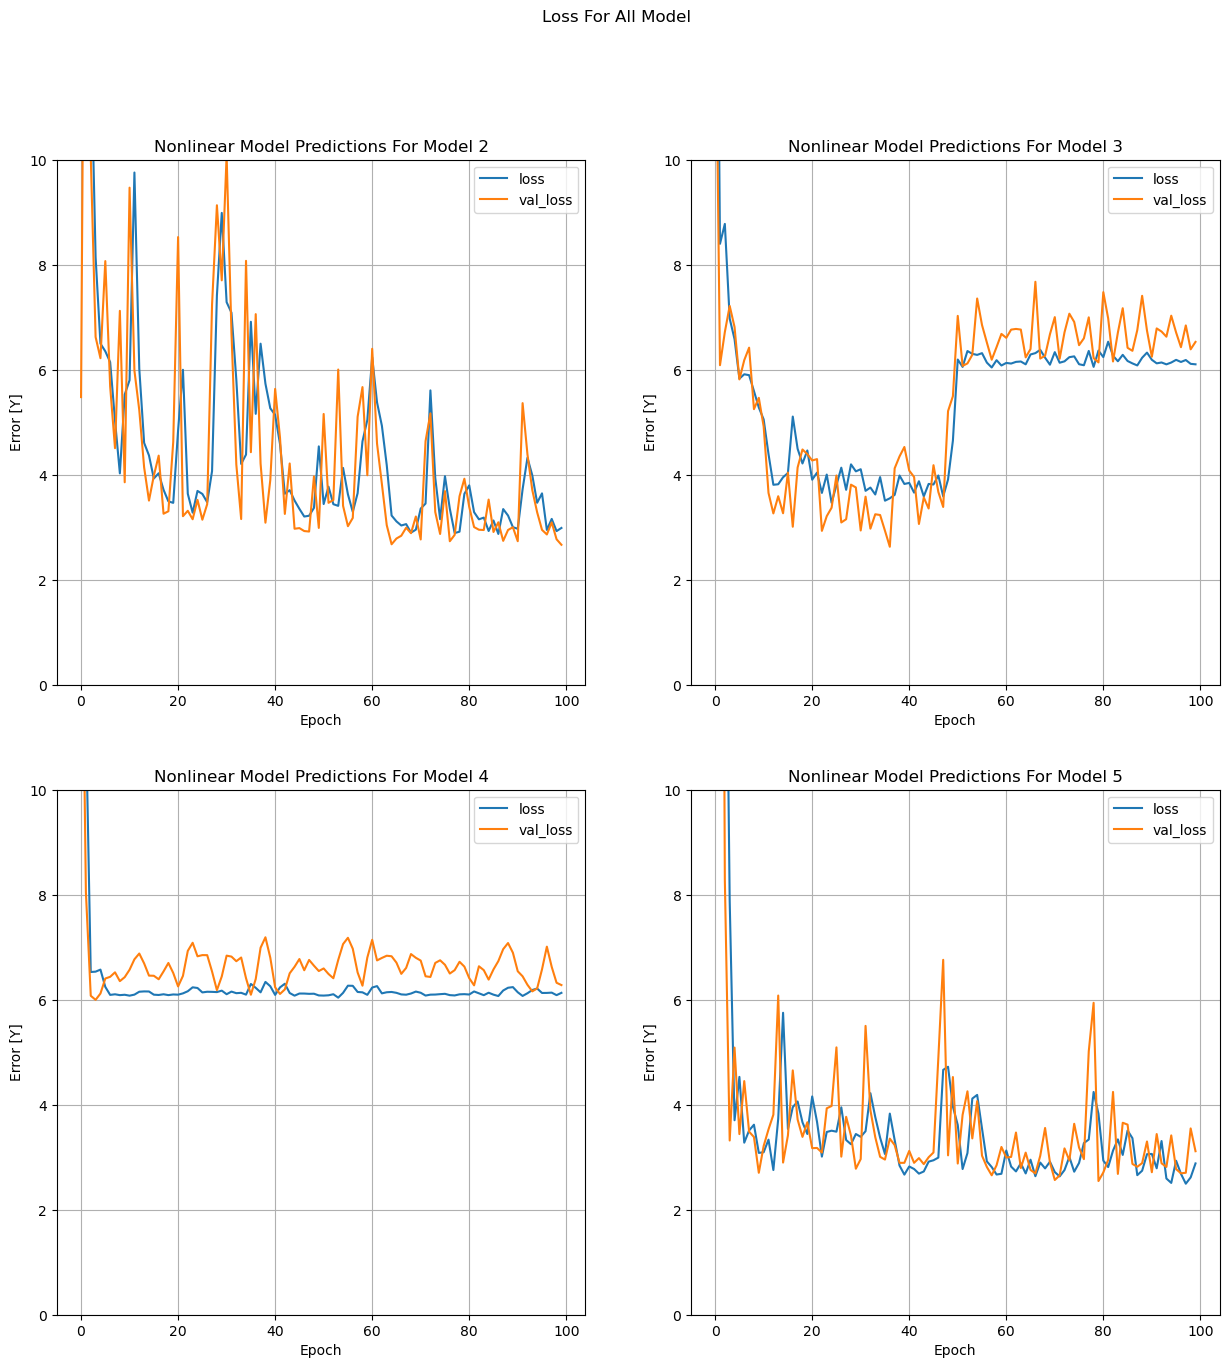

In [270]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Loss For All Model ')

axs[0,0].plot(history2.history['loss'], label='loss')
axs[0,0].plot(history2.history['val_loss'], label='val_loss')
axs[0,0].set_ylim([0, 10])
axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Error [Y]')
axs[0,0].legend()
axs[0,0].grid(True)
axs[0,0].set_title('Nonlinear Model Predictions For Model 2')

axs[0,1].plot(history3.history['loss'], label='loss')
axs[0,1].plot(history3.history['val_loss'], label='val_loss')
axs[0,1].set_ylim([0, 10])
axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('Error [Y]')
axs[0,1].legend()
axs[0,1].grid(True)
axs[0,1].set_title('Nonlinear Model Predictions For Model 3')

axs[1,0].plot(history4.history['loss'], label='loss')
axs[1,0].plot(history4.history['val_loss'], label='val_loss')
axs[1,0].set_ylim([0, 10])
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Error [Y]')
axs[1,0].legend()
axs[1,0].grid(True)
axs[1,0].set_title('Nonlinear Model Predictions For Model 4')

axs[1,1].plot(history5.history['loss'], label='loss')
axs[1,1].plot(history5.history['val_loss'], label='val_loss')
axs[1,1].set_ylim([0, 10])
axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('Error [Y]')
axs[1,1].legend()
axs[1,1].grid(True)
axs[1,1].set_title('Nonlinear Model Predictions For Model 5')

plt.show()


In [271]:
x_train = train_features
y_train = train_labels

In [272]:
Predictions_NL1 = NL_model1.predict(x_train).flatten()
Predictions_NL2 = NL_model2.predict(x_train).flatten()
Predictions_NL3 = NL_model3.predict(x_train).flatten()
Predictions_NL4 = NL_model4.predict(x_train).flatten()
Predictions_NL5 = NL_model5.predict(x_train).flatten()

7/7 [==============================] - 0s 852us/step


In [273]:
train_features

array([[8.0000000e+00, 3.1800000e+02, 1.4000000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 9.6731013e-01],
       [6.0000000e+00, 1.9900000e+02, 9.7000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 7.2670197e-01],
       [4.0000000e+00, 1.2200000e+02, 8.6000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 5.8942044e-01],
       ...,
       [6.0000000e+00, 2.5000000e+02, 8.8000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 6.1624485e-01],
       [4.0000000e+00, 1.2000000e+02, 9.7000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 8.9916285e-13],
       [6.0000000e+00, 2.2500000e+02, 1.0000000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 7.5879019e-01]], dtype=float32)

In [274]:
train_labels

158    17.5
83     18.0
170    21.0
101    32.2
150    15.0
       ... 
163    16.0
151    28.0
202    18.0
31     23.0
209    22.0
Name: mpg, Length: 205, dtype: float64

## 15)PREDICTED VALUE VS NON-PREDICTED VALUE FOR NON-LINEAR MODEL

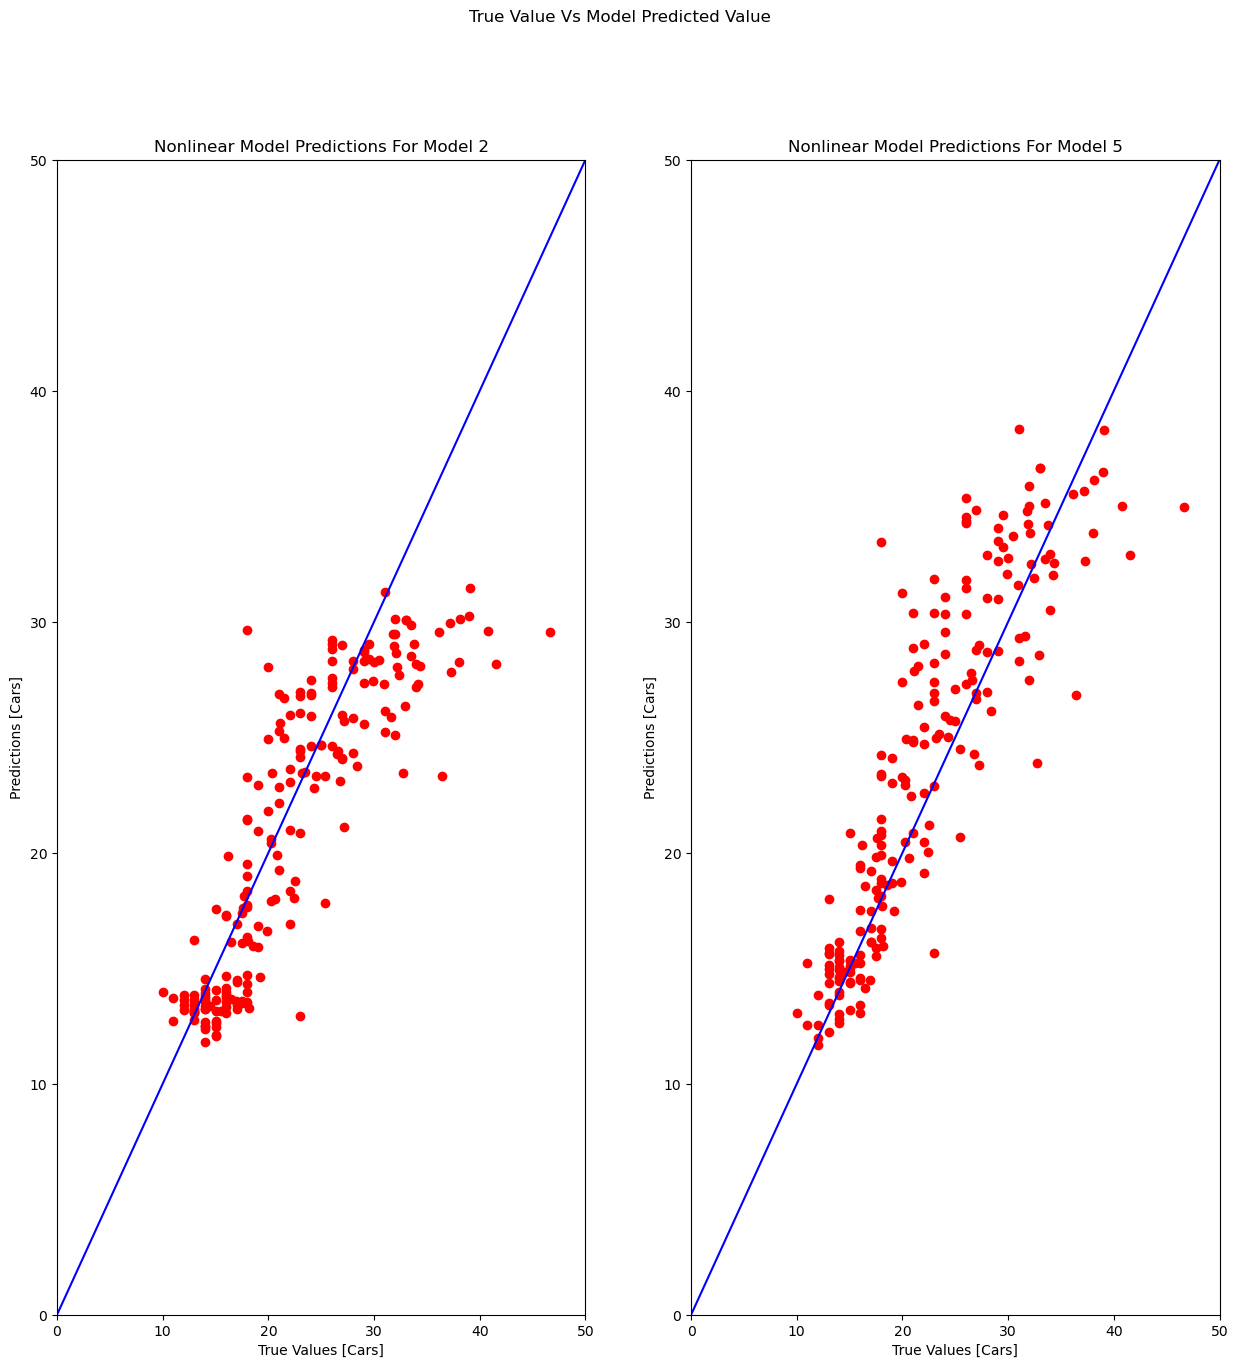

In [275]:
lims = [0, 50]
fig, axs = plt.subplots(1,2,figsize=(15,15))
fig.suptitle('True Value Vs Model Predicted Value')

axs[0].scatter(y_train, Predictions_NL2,color='r')
axs[0].set_xlabel('True Values [Cars]')
axs[0].set_ylabel('Predictions [Cars]')
axs[0].set_xlim(lims)
axs[0].set_ylim(lims)
axs[0].plot(lims,lims,color='b')
axs[0].set_title('Nonlinear Model Predictions For Model 2')


axs[1].scatter(y_train, Predictions_NL5,color='r')
axs[1].set_xlabel('True Values [Cars]')
axs[1].set_ylabel('Predictions [Cars]')
axs[1].set_xlim(lims)
axs[1].set_ylim(lims)
axs[1].plot(lims,lims,color='b')
axs[1].set_title('Nonlinear Model Predictions For Model 5')



plt.show()

In [276]:
#train_features 
#test_features
#train_labels
#test_labels